In [1]:
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import gym
from MetaWorld.searchTest.utils import MyEnv, ToyExpertModel, sample_expert_transitions, benchmark_policy, LearnWrapper, train_policy, SuperMyGymWrapper, supermipWrapper, LearnWrapper
import torch
import zipfile
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv
import importlib
import numpy as np
from RlBaselines3Zoo import enjoy
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.ppo import MlpPolicy

from imitation.algorithms import bc
from imitation.data import rollout
from imitation.data.wrappers import RolloutInfoWrapper

from stable_baselines3.common.policies import MultiInputActorCriticPolicy
from stable_baselines3.common.torch_layers import (
    BaseFeaturesExtractor,
    CombinedExtractor,
    FlattenExtractor,
    NatureCNN,
    create_mlp,
    get_actor_critic_arch,
)
from sb3_contrib.tqc.tqc import TQC
from sb3_contrib.tqc.policies import MultiInputPolicy
import numpy as np
import torch as th

model = enjoy.main(inpt_args="--algo tqc --env FetchPickAndPlace-v1 --folder /home/hendrik/Documents/master_project/Code/RlBaselines3Zoo/rl-trained-agents -n 300 --ret_model True")

/home/hendrik/anaconda3/envs/tfTest/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/hendrik/anaconda3/envs/tfTest/lib/python3.9/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
2022-07-22 18:12:57.673393: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Loading latest experiment, id=1
Loading /home/hendrik/Documents/master_project/Code/RlBaselines3Zoo/rl-trained-agents/tqc/FetchPickAndPlace-v1_1/FetchPickAndPlace-v1.zip


/home/hendrik/anaconda3/envs/tfTest/lib/python3.9/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


In [8]:



#env = SuperMyGymWrapper(tag = None, bo=env).make_wrapper()
def sample_expert_transitions():
    expert = model

    print("Sampling expert transitions.")
    rollouts = rollout.rollout(
        expert,
        DummyVecEnv([lambda: RolloutInfoWrapper(model.env.envs[0])]),
        rollout.make_sample_until(min_timesteps=None, min_episodes=1000),
        unwrap=True
    )
    return rollout.flatten_trajectories(rollouts)


transitions = sample_expert_transitions()
tp = '/home/hendrik/Documents/master_project/LokalData/ImitationLearning/transitions'


Sampling expert transitions.


In [9]:
torch.save(transitions, tp)

In [16]:
del transitions

In [18]:
transitions = torch.load(tp)

In [13]:
bc_policy = MultiInputActorCriticPolicy(observation_space=model.observation_space, action_space=model.action_space, lr_schedule=lambda a: 1, features_extractor_class=CombinedExtractor)

In [19]:
env = model.env
bc_trainer = bc.BC(
    observation_space=env.observation_space,
    action_space=env.action_space,
    demonstrations=transitions,
    policy=bc_policy,
    
)

print("Training a policy using Behavior Cloning")

Training a policy using Behavior Cloning


log dir: /home/hendrik/Documents/master_project/LokalData/ImitationLearning/gboard/BC Trainer Test/train/


0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000484 |
|    entropy        | 0.484     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 4.26e+03  |
|    loss           | 0.13      |
|    neglogp        | 0.131     |
|    prob_true_act  | 1.46      |
|    samples_so_far | 3         |
---------------------------------


484batch [00:01, 371.97batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 500       |
|    ent_loss       | -0.000512 |
|    entropy        | 0.512     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 4.26e+03  |
|    loss           | 0.403     |
|    neglogp        | 0.404     |
|    prob_true_act  | 1.37      |
|    samples_so_far | 1503      |
---------------------------------


983batch [00:02, 382.13batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 1000      |
|    ent_loss       | -0.000504 |
|    entropy        | 0.504     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 4.26e+03  |
|    loss           | 0.878     |
|    neglogp        | 0.878     |
|    prob_true_act  | 1.13      |
|    samples_so_far | 3003      |
---------------------------------


1468batch [00:03, 402.74batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 1500      |
|    ent_loss       | -0.000502 |
|    entropy        | 0.502     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 4.27e+03  |
|    loss           | 0.46      |
|    neglogp        | 0.46      |
|    prob_true_act  | 1.42      |
|    samples_so_far | 4503      |
---------------------------------


1990batch [00:05, 394.97batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 2000      |
|    ent_loss       | -0.000475 |
|    entropy        | 0.475     |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 4.27e+03  |
|    loss           | 0.000531  |
|    neglogp        | 0.00101   |
|    prob_true_act  | 1.55      |
|    samples_so_far | 6003      |
---------------------------------


2495batch [00:06, 371.05batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 2500      |
|    ent_loss       | -0.000516 |
|    entropy        | 0.516     |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 4.28e+03  |
|    loss           | 0.552     |
|    neglogp        | 0.552     |
|    prob_true_act  | 1.08      |
|    samples_so_far | 7503      |
---------------------------------


2971batch [00:07, 385.69batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 3000      |
|    ent_loss       | -0.000489 |
|    entropy        | 0.489     |
|    epoch          | 1         |
|    l2_loss        | 0         |
|    l2_norm        | 4.28e+03  |
|    loss           | 0.478     |
|    neglogp        | 0.479     |
|    prob_true_act  | 1.31      |
|    samples_so_far | 9003      |
---------------------------------


3477batch [00:09, 380.90batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 3500     |
|    ent_loss       | -0.0005  |
|    entropy        | 0.5      |
|    epoch          | 2        |
|    l2_loss        | 0        |
|    l2_norm        | 4.28e+03 |
|    loss           | 1        |
|    neglogp        | 1        |
|    prob_true_act  | 1.17     |
|    samples_so_far | 10503    |
--------------------------------


3995batch [00:10, 383.42batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 4000      |
|    ent_loss       | -0.000528 |
|    entropy        | 0.528     |
|    epoch          | 2         |
|    l2_loss        | 0         |
|    l2_norm        | 4.29e+03  |
|    loss           | 0.275     |
|    neglogp        | 0.275     |
|    prob_true_act  | 1.25      |
|    samples_so_far | 12003     |
---------------------------------


4469batch [00:11, 391.40batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 4500     |
|    ent_loss       | -0.0005  |
|    entropy        | 0.5      |
|    epoch          | 2        |
|    l2_loss        | 0        |
|    l2_norm        | 4.29e+03 |
|    loss           | 0.594    |
|    neglogp        | 0.594    |
|    prob_true_act  | 1.36     |
|    samples_so_far | 13503    |
--------------------------------


4980batch [00:13, 370.47batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 5000      |
|    ent_loss       | -0.000498 |
|    entropy        | 0.498     |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 4.3e+03   |
|    loss           | 0.629     |
|    neglogp        | 0.63      |
|    prob_true_act  | 1.08      |
|    samples_so_far | 15003     |
---------------------------------


5486batch [00:14, 370.25batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 5500      |
|    ent_loss       | -0.000486 |
|    entropy        | 0.486     |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 4.3e+03   |
|    loss           | 0.319     |
|    neglogp        | 0.319     |
|    prob_true_act  | 1.26      |
|    samples_so_far | 16503     |
---------------------------------


5996batch [00:15, 383.29batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 6000      |
|    ent_loss       | -0.000503 |
|    entropy        | 0.503     |
|    epoch          | 3         |
|    l2_loss        | 0         |
|    l2_norm        | 4.31e+03  |
|    loss           | 0.321     |
|    neglogp        | 0.322     |
|    prob_true_act  | 1.53      |
|    samples_so_far | 18003     |
---------------------------------


6497batch [00:17, 370.58batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 6500      |
|    ent_loss       | -0.000506 |
|    entropy        | 0.506     |
|    epoch          | 4         |
|    l2_loss        | 0         |
|    l2_norm        | 4.31e+03  |
|    loss           | 0.283     |
|    neglogp        | 0.284     |
|    prob_true_act  | 1.22      |
|    samples_so_far | 19503     |
---------------------------------


6963batch [00:18, 383.57batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 7000     |
|    ent_loss       | -0.00047 |
|    entropy        | 0.47     |
|    epoch          | 4        |
|    l2_loss        | 0        |
|    l2_norm        | 4.31e+03 |
|    loss           | 0.315    |
|    neglogp        | 0.316    |
|    prob_true_act  | 1.36     |
|    samples_so_far | 21003    |
--------------------------------


7472batch [00:19, 371.00batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 7500      |
|    ent_loss       | -0.000535 |
|    entropy        | 0.535     |
|    epoch          | 4         |
|    l2_loss        | 0         |
|    l2_norm        | 4.32e+03  |
|    loss           | 0.315     |
|    neglogp        | 0.315     |
|    prob_true_act  | 1.28      |
|    samples_so_far | 22503     |
---------------------------------


7986batch [00:20, 384.22batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 8000      |
|    ent_loss       | -0.000511 |
|    entropy        | 0.511     |
|    epoch          | 5         |
|    l2_loss        | 0         |
|    l2_norm        | 4.32e+03  |
|    loss           | 0.0904    |
|    neglogp        | 0.0909    |
|    prob_true_act  | 1.34      |
|    samples_so_far | 24003     |
---------------------------------


8495batch [00:22, 380.20batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 8500      |
|    ent_loss       | -0.000478 |
|    entropy        | 0.478     |
|    epoch          | 5         |
|    l2_loss        | 0         |
|    l2_norm        | 4.32e+03  |
|    loss           | 0.179     |
|    neglogp        | 0.18      |
|    prob_true_act  | 1.52      |
|    samples_so_far | 25503     |
---------------------------------


9000batch [00:23, 372.86batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 9000      |
|    ent_loss       | -0.000528 |
|    entropy        | 0.528     |
|    epoch          | 5         |
|    l2_loss        | 0         |
|    l2_norm        | 4.33e+03  |
|    loss           | 0.604     |
|    neglogp        | 0.605     |
|    prob_true_act  | 1.04      |
|    samples_so_far | 27003     |
---------------------------------


9471batch [00:24, 377.51batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 9500      |
|    ent_loss       | -0.000523 |
|    entropy        | 0.523     |
|    epoch          | 6         |
|    l2_loss        | 0         |
|    l2_norm        | 4.33e+03  |
|    loss           | -0.121    |
|    neglogp        | -0.12     |
|    prob_true_act  | 1.81      |
|    samples_so_far | 28503     |
---------------------------------


9977batch [00:26, 376.00batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 10000     |
|    ent_loss       | -0.000491 |
|    entropy        | 0.491     |
|    epoch          | 6         |
|    l2_loss        | 0         |
|    l2_norm        | 4.34e+03  |
|    loss           | 0.461     |
|    neglogp        | 0.462     |
|    prob_true_act  | 1.34      |
|    samples_so_far | 30003     |
---------------------------------


10491batch [00:27, 385.99batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 10500     |
|    ent_loss       | -0.000488 |
|    entropy        | 0.488     |
|    epoch          | 6         |
|    l2_loss        | 0         |
|    l2_norm        | 4.34e+03  |
|    loss           | 0.432     |
|    neglogp        | 0.432     |
|    prob_true_act  | 1.33      |
|    samples_so_far | 31503     |
---------------------------------


10994batch [00:28, 370.05batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 11000     |
|    ent_loss       | -0.000503 |
|    entropy        | 0.503     |
|    epoch          | 7         |
|    l2_loss        | 0         |
|    l2_norm        | 4.35e+03  |
|    loss           | 0.378     |
|    neglogp        | 0.378     |
|    prob_true_act  | 1.68      |
|    samples_so_far | 33003     |
---------------------------------


11494batch [00:30, 377.02batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 11500     |
|    ent_loss       | -0.000498 |
|    entropy        | 0.498     |
|    epoch          | 7         |
|    l2_loss        | 0         |
|    l2_norm        | 4.35e+03  |
|    loss           | 0.395     |
|    neglogp        | 0.396     |
|    prob_true_act  | 1.2       |
|    samples_so_far | 34503     |
---------------------------------


11994batch [00:31, 380.47batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 12000     |
|    ent_loss       | -0.000487 |
|    entropy        | 0.487     |
|    epoch          | 7         |
|    l2_loss        | 0         |
|    l2_norm        | 4.35e+03  |
|    loss           | 0.49      |
|    neglogp        | 0.491     |
|    prob_true_act  | 1.5       |
|    samples_so_far | 36003     |
---------------------------------


12493batch [00:32, 370.76batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 12500     |
|    ent_loss       | -0.000515 |
|    entropy        | 0.515     |
|    epoch          | 8         |
|    l2_loss        | 0         |
|    l2_norm        | 4.36e+03  |
|    loss           | 0.939     |
|    neglogp        | 0.939     |
|    prob_true_act  | 1.15      |
|    samples_so_far | 37503     |
---------------------------------


12961batch [00:34, 383.85batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 13000     |
|    ent_loss       | -0.000514 |
|    entropy        | 0.514     |
|    epoch          | 8         |
|    l2_loss        | 0         |
|    l2_norm        | 4.36e+03  |
|    loss           | 0.454     |
|    neglogp        | 0.455     |
|    prob_true_act  | 1.15      |
|    samples_so_far | 39003     |
---------------------------------


13463batch [00:35, 377.17batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 13500     |
|    ent_loss       | -0.000477 |
|    entropy        | 0.477     |
|    epoch          | 8         |
|    l2_loss        | 0         |
|    l2_norm        | 4.36e+03  |
|    loss           | 0.613     |
|    neglogp        | 0.613     |
|    prob_true_act  | 1.12      |
|    samples_so_far | 40503     |
---------------------------------


13984batch [00:36, 389.65batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 14000     |
|    ent_loss       | -0.000493 |
|    entropy        | 0.493     |
|    epoch          | 8         |
|    l2_loss        | 0         |
|    l2_norm        | 4.37e+03  |
|    loss           | 1.06      |
|    neglogp        | 1.06      |
|    prob_true_act  | 1.26      |
|    samples_so_far | 42003     |
---------------------------------


14496batch [00:38, 392.54batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 14500     |
|    ent_loss       | -0.000498 |
|    entropy        | 0.498     |
|    epoch          | 9         |
|    l2_loss        | 0         |
|    l2_norm        | 4.37e+03  |
|    loss           | 0.28      |
|    neglogp        | 0.281     |
|    prob_true_act  | 1.62      |
|    samples_so_far | 43503     |
---------------------------------


14962batch [00:39, 388.43batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 15000     |
|    ent_loss       | -0.000515 |
|    entropy        | 0.515     |
|    epoch          | 9         |
|    l2_loss        | 0         |
|    l2_norm        | 4.38e+03  |
|    loss           | 0.355     |
|    neglogp        | 0.356     |
|    prob_true_act  | 1.34      |
|    samples_so_far | 45003     |
---------------------------------


15462batch [00:40, 370.03batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 15500     |
|    ent_loss       | -0.000525 |
|    entropy        | 0.525     |
|    epoch          | 9         |
|    l2_loss        | 0         |
|    l2_norm        | 4.38e+03  |
|    loss           | 0.339     |
|    neglogp        | 0.34      |
|    prob_true_act  | 1.32      |
|    samples_so_far | 46503     |
---------------------------------


15963batch [00:42, 386.28batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 16000     |
|    ent_loss       | -0.000446 |
|    entropy        | 0.446     |
|    epoch          | 10        |
|    l2_loss        | 0         |
|    l2_norm        | 4.38e+03  |
|    loss           | 0.488     |
|    neglogp        | 0.489     |
|    prob_true_act  | 1.2       |
|    samples_so_far | 48003     |
---------------------------------


16479batch [00:43, 394.71batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 16500     |
|    ent_loss       | -0.000529 |
|    entropy        | 0.529     |
|    epoch          | 10        |
|    l2_loss        | 0         |
|    l2_norm        | 4.39e+03  |
|    loss           | -0.0109   |
|    neglogp        | -0.0104   |
|    prob_true_act  | 1.56      |
|    samples_so_far | 49503     |
---------------------------------


16968batch [00:44, 399.76batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 17000     |
|    ent_loss       | -0.000465 |
|    entropy        | 0.465     |
|    epoch          | 10        |
|    l2_loss        | 0         |
|    l2_norm        | 4.39e+03  |
|    loss           | 1.33      |
|    neglogp        | 1.33      |
|    prob_true_act  | 1.14      |
|    samples_so_far | 51003     |
---------------------------------


17495batch [00:46, 399.76batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 17500     |
|    ent_loss       | -0.000493 |
|    entropy        | 0.493     |
|    epoch          | 11        |
|    l2_loss        | 0         |
|    l2_norm        | 4.4e+03   |
|    loss           | 0.27      |
|    neglogp        | 0.27      |
|    prob_true_act  | 1.38      |
|    samples_so_far | 52503     |
---------------------------------


17978batch [00:47, 397.79batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 18000     |
|    ent_loss       | -0.000493 |
|    entropy        | 0.493     |
|    epoch          | 11        |
|    l2_loss        | 0         |
|    l2_norm        | 4.4e+03   |
|    loss           | 0.117     |
|    neglogp        | 0.117     |
|    prob_true_act  | 1.62      |
|    samples_so_far | 54003     |
---------------------------------


18498batch [00:48, 391.43batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 18500     |
|    ent_loss       | -0.000499 |
|    entropy        | 0.499     |
|    epoch          | 11        |
|    l2_loss        | 0         |
|    l2_norm        | 4.4e+03   |
|    loss           | 0.41      |
|    neglogp        | 0.411     |
|    prob_true_act  | 1.24      |
|    samples_so_far | 55503     |
---------------------------------


18974batch [00:49, 390.84batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 19000     |
|    ent_loss       | -0.000479 |
|    entropy        | 0.479     |
|    epoch          | 12        |
|    l2_loss        | 0         |
|    l2_norm        | 4.41e+03  |
|    loss           | 0.692     |
|    neglogp        | 0.692     |
|    prob_true_act  | 0.968     |
|    samples_so_far | 57003     |
---------------------------------


19488batch [00:51, 384.90batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 19500     |
|    ent_loss       | -0.000464 |
|    entropy        | 0.464     |
|    epoch          | 12        |
|    l2_loss        | 0         |
|    l2_norm        | 4.41e+03  |
|    loss           | 0.714     |
|    neglogp        | 0.715     |
|    prob_true_act  | 1.3       |
|    samples_so_far | 58503     |
---------------------------------


19962batch [00:52, 391.59batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 20000    |
|    ent_loss       | -0.0005  |
|    entropy        | 0.5      |
|    epoch          | 12       |
|    l2_loss        | 0        |
|    l2_norm        | 4.42e+03 |
|    loss           | 0.909    |
|    neglogp        | 0.91     |
|    prob_true_act  | 0.961    |
|    samples_so_far | 60003    |
--------------------------------


20483batch [00:53, 390.68batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 20500     |
|    ent_loss       | -0.000476 |
|    entropy        | 0.476     |
|    epoch          | 13        |
|    l2_loss        | 0         |
|    l2_norm        | 4.42e+03  |
|    loss           | 0.642     |
|    neglogp        | 0.642     |
|    prob_true_act  | 1.05      |
|    samples_so_far | 61503     |
---------------------------------


20992batch [00:55, 379.49batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 21000    |
|    ent_loss       | -0.00048 |
|    entropy        | 0.48     |
|    epoch          | 13       |
|    l2_loss        | 0        |
|    l2_norm        | 4.42e+03 |
|    loss           | 0.169    |
|    neglogp        | 0.169    |
|    prob_true_act  | 1.33     |
|    samples_so_far | 63003    |
--------------------------------


21497batch [00:56, 387.98batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 21500     |
|    ent_loss       | -0.000468 |
|    entropy        | 0.468     |
|    epoch          | 13        |
|    l2_loss        | 0         |
|    l2_norm        | 4.43e+03  |
|    loss           | 0.626     |
|    neglogp        | 0.627     |
|    prob_true_act  | 1.14      |
|    samples_so_far | 64503     |
---------------------------------


21963batch [00:57, 369.11batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 22000     |
|    ent_loss       | -0.000504 |
|    entropy        | 0.504     |
|    epoch          | 14        |
|    l2_loss        | 0         |
|    l2_norm        | 4.43e+03  |
|    loss           | 0.26      |
|    neglogp        | 0.26      |
|    prob_true_act  | 1.28      |
|    samples_so_far | 66003     |
---------------------------------


22466batch [00:58, 381.01batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 22500     |
|    ent_loss       | -0.000476 |
|    entropy        | 0.476     |
|    epoch          | 14        |
|    l2_loss        | 0         |
|    l2_norm        | 4.43e+03  |
|    loss           | 0.769     |
|    neglogp        | 0.77      |
|    prob_true_act  | 1.3       |
|    samples_so_far | 67503     |
---------------------------------


22997batch [01:00, 361.78batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 23000     |
|    ent_loss       | -0.000486 |
|    entropy        | 0.486     |
|    epoch          | 14        |
|    l2_loss        | 0         |
|    l2_norm        | 4.44e+03  |
|    loss           | 0.565     |
|    neglogp        | 0.566     |
|    prob_true_act  | 1.13      |
|    samples_so_far | 69003     |
---------------------------------


23479batch [01:01, 367.53batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 23500    |
|    ent_loss       | -0.00048 |
|    entropy        | 0.48     |
|    epoch          | 15       |
|    l2_loss        | 0        |
|    l2_norm        | 4.44e+03 |
|    loss           | -0.0438  |
|    neglogp        | -0.0434  |
|    prob_true_act  | 1.54     |
|    samples_so_far | 70503    |
--------------------------------


23970batch [01:03, 378.25batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 24000     |
|    ent_loss       | -0.000481 |
|    entropy        | 0.481     |
|    epoch          | 15        |
|    l2_loss        | 0         |
|    l2_norm        | 4.45e+03  |
|    loss           | 0.92      |
|    neglogp        | 0.921     |
|    prob_true_act  | 0.924     |
|    samples_so_far | 72003     |
---------------------------------


24465batch [01:04, 370.43batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 24500    |
|    ent_loss       | -0.00051 |
|    entropy        | 0.51     |
|    epoch          | 15       |
|    l2_loss        | 0        |
|    l2_norm        | 4.45e+03 |
|    loss           | 0.594    |
|    neglogp        | 0.594    |
|    prob_true_act  | 1.21     |
|    samples_so_far | 73503    |
--------------------------------


24997batch [01:05, 373.38batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 25000     |
|    ent_loss       | -0.000524 |
|    entropy        | 0.524     |
|    epoch          | 16        |
|    l2_loss        | 0         |
|    l2_norm        | 4.45e+03  |
|    loss           | 0.62      |
|    neglogp        | 0.62      |
|    prob_true_act  | 1.2       |
|    samples_so_far | 75003     |
---------------------------------


25496batch [01:07, 373.46batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 25500    |
|    ent_loss       | -0.00051 |
|    entropy        | 0.51     |
|    epoch          | 16       |
|    l2_loss        | 0        |
|    l2_norm        | 4.46e+03 |
|    loss           | 0.748    |
|    neglogp        | 0.748    |
|    prob_true_act  | 1.21     |
|    samples_so_far | 76503    |
--------------------------------


25987batch [01:08, 379.80batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 26000     |
|    ent_loss       | -0.000484 |
|    entropy        | 0.484     |
|    epoch          | 16        |
|    l2_loss        | 0         |
|    l2_norm        | 4.46e+03  |
|    loss           | 0.835     |
|    neglogp        | 0.835     |
|    prob_true_act  | 1.13      |
|    samples_so_far | 78003     |
---------------------------------


26492batch [01:09, 382.81batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 26500     |
|    ent_loss       | -0.000486 |
|    entropy        | 0.486     |
|    epoch          | 16        |
|    l2_loss        | 0         |
|    l2_norm        | 4.47e+03  |
|    loss           | 0.482     |
|    neglogp        | 0.482     |
|    prob_true_act  | 1.33      |
|    samples_so_far | 79503     |
---------------------------------


26996batch [01:11, 376.76batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 27000     |
|    ent_loss       | -0.000473 |
|    entropy        | 0.473     |
|    epoch          | 17        |
|    l2_loss        | 0         |
|    l2_norm        | 4.47e+03  |
|    loss           | 0.198     |
|    neglogp        | 0.198     |
|    prob_true_act  | 1.59      |
|    samples_so_far | 81003     |
---------------------------------


27469batch [01:12, 393.31batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 27500     |
|    ent_loss       | -0.000526 |
|    entropy        | 0.526     |
|    epoch          | 17        |
|    l2_loss        | 0         |
|    l2_norm        | 4.47e+03  |
|    loss           | 0.334     |
|    neglogp        | 0.335     |
|    prob_true_act  | 1.26      |
|    samples_so_far | 82503     |
---------------------------------


27972batch [01:13, 377.52batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 28000     |
|    ent_loss       | -0.000507 |
|    entropy        | 0.507     |
|    epoch          | 17        |
|    l2_loss        | 0         |
|    l2_norm        | 4.48e+03  |
|    loss           | 0.416     |
|    neglogp        | 0.416     |
|    prob_true_act  | 1.39      |
|    samples_so_far | 84003     |
---------------------------------


28480batch [01:15, 391.74batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 28500     |
|    ent_loss       | -0.000499 |
|    entropy        | 0.499     |
|    epoch          | 18        |
|    l2_loss        | 0         |
|    l2_norm        | 4.48e+03  |
|    loss           | 0.859     |
|    neglogp        | 0.86      |
|    prob_true_act  | 1.16      |
|    samples_so_far | 85503     |
---------------------------------


28989batch [01:16, 375.20batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 29000     |
|    ent_loss       | -0.000507 |
|    entropy        | 0.507     |
|    epoch          | 18        |
|    l2_loss        | 0         |
|    l2_norm        | 4.48e+03  |
|    loss           | 0.154     |
|    neglogp        | 0.155     |
|    prob_true_act  | 1.52      |
|    samples_so_far | 87003     |
---------------------------------


29462batch [01:17, 386.09batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 29500     |
|    ent_loss       | -0.000477 |
|    entropy        | 0.477     |
|    epoch          | 18        |
|    l2_loss        | 0         |
|    l2_norm        | 4.49e+03  |
|    loss           | 1.02      |
|    neglogp        | 1.02      |
|    prob_true_act  | 1.31      |
|    samples_so_far | 88503     |
---------------------------------


29964batch [01:19, 379.67batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 30000     |
|    ent_loss       | -0.000488 |
|    entropy        | 0.488     |
|    epoch          | 19        |
|    l2_loss        | 0         |
|    l2_norm        | 4.49e+03  |
|    loss           | 0.472     |
|    neglogp        | 0.472     |
|    prob_true_act  | 1.08      |
|    samples_so_far | 90003     |
---------------------------------


30471batch [01:20, 384.32batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 30500     |
|    ent_loss       | -0.000502 |
|    entropy        | 0.502     |
|    epoch          | 19        |
|    l2_loss        | 0         |
|    l2_norm        | 4.5e+03   |
|    loss           | 0.0571    |
|    neglogp        | 0.0576    |
|    prob_true_act  | 1.51      |
|    samples_so_far | 91503     |
---------------------------------


30977batch [01:21, 375.34batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 31000     |
|    ent_loss       | -0.000512 |
|    entropy        | 0.512     |
|    epoch          | 19        |
|    l2_loss        | 0         |
|    l2_norm        | 4.5e+03   |
|    loss           | 0.724     |
|    neglogp        | 0.724     |
|    prob_true_act  | 1.04      |
|    samples_so_far | 93003     |
---------------------------------


31492batch [01:23, 379.95batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 31500     |
|    ent_loss       | -0.000526 |
|    entropy        | 0.526     |
|    epoch          | 20        |
|    l2_loss        | 0         |
|    l2_norm        | 4.51e+03  |
|    loss           | 0.795     |
|    neglogp        | 0.795     |
|    prob_true_act  | 1.09      |
|    samples_so_far | 94503     |
---------------------------------


31995batch [01:24, 375.49batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 32000     |
|    ent_loss       | -0.000477 |
|    entropy        | 0.477     |
|    epoch          | 20        |
|    l2_loss        | 0         |
|    l2_norm        | 4.51e+03  |
|    loss           | 0.448     |
|    neglogp        | 0.448     |
|    prob_true_act  | 1.54      |
|    samples_so_far | 96003     |
---------------------------------


32461batch [01:25, 390.96batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 32500     |
|    ent_loss       | -0.000459 |
|    entropy        | 0.459     |
|    epoch          | 20        |
|    l2_loss        | 0         |
|    l2_norm        | 4.51e+03  |
|    loss           | 0.0547    |
|    neglogp        | 0.0552    |
|    prob_true_act  | 1.51      |
|    samples_so_far | 97503     |
---------------------------------


32973batch [01:27, 362.15batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 33000     |
|    ent_loss       | -0.000493 |
|    entropy        | 0.493     |
|    epoch          | 21        |
|    l2_loss        | 0         |
|    l2_norm        | 4.52e+03  |
|    loss           | 0.565     |
|    neglogp        | 0.565     |
|    prob_true_act  | 1.29      |
|    samples_so_far | 99003     |
---------------------------------


33476batch [01:28, 389.95batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 33500     |
|    ent_loss       | -0.000499 |
|    entropy        | 0.499     |
|    epoch          | 21        |
|    l2_loss        | 0         |
|    l2_norm        | 4.52e+03  |
|    loss           | 0.536     |
|    neglogp        | 0.536     |
|    prob_true_act  | 1.19      |
|    samples_so_far | 100503    |
---------------------------------


33996batch [01:29, 385.49batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 34000     |
|    ent_loss       | -0.000483 |
|    entropy        | 0.483     |
|    epoch          | 21        |
|    l2_loss        | 0         |
|    l2_norm        | 4.53e+03  |
|    loss           | 0.622     |
|    neglogp        | 0.623     |
|    prob_true_act  | 1.45      |
|    samples_so_far | 102003    |
---------------------------------


34473batch [01:30, 386.61batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 34500     |
|    ent_loss       | -0.000485 |
|    entropy        | 0.485     |
|    epoch          | 22        |
|    l2_loss        | 0         |
|    l2_norm        | 4.53e+03  |
|    loss           | 0.164     |
|    neglogp        | 0.165     |
|    prob_true_act  | 1.26      |
|    samples_so_far | 103503    |
---------------------------------


34985batch [01:32, 395.00batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 35000     |
|    ent_loss       | -0.000471 |
|    entropy        | 0.471     |
|    epoch          | 22        |
|    l2_loss        | 0         |
|    l2_norm        | 4.53e+03  |
|    loss           | 0.386     |
|    neglogp        | 0.386     |
|    prob_true_act  | 1.58      |
|    samples_so_far | 105003    |
---------------------------------


35493batch [01:33, 380.11batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 35500     |
|    ent_loss       | -0.000457 |
|    entropy        | 0.457     |
|    epoch          | 22        |
|    l2_loss        | 0         |
|    l2_norm        | 4.54e+03  |
|    loss           | 0.54      |
|    neglogp        | 0.541     |
|    prob_true_act  | 1.28      |
|    samples_so_far | 106503    |
---------------------------------


36000batch [01:34, 368.11batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 36000     |
|    ent_loss       | -0.000495 |
|    entropy        | 0.495     |
|    epoch          | 23        |
|    l2_loss        | 0         |
|    l2_norm        | 4.54e+03  |
|    loss           | 0.329     |
|    neglogp        | 0.329     |
|    prob_true_act  | 1.31      |
|    samples_so_far | 108003    |
---------------------------------


36471batch [01:36, 371.20batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 36500     |
|    ent_loss       | -0.000545 |
|    entropy        | 0.545     |
|    epoch          | 23        |
|    l2_loss        | 0         |
|    l2_norm        | 4.55e+03  |
|    loss           | 0.43      |
|    neglogp        | 0.43      |
|    prob_true_act  | 1.06      |
|    samples_so_far | 109503    |
---------------------------------


36989batch [01:37, 395.61batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 37000     |
|    ent_loss       | -0.000487 |
|    entropy        | 0.487     |
|    epoch          | 23        |
|    l2_loss        | 0         |
|    l2_norm        | 4.55e+03  |
|    loss           | 0.766     |
|    neglogp        | 0.766     |
|    prob_true_act  | 1.21      |
|    samples_so_far | 111003    |
---------------------------------


37464batch [01:38, 371.81batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 37500     |
|    ent_loss       | -0.000513 |
|    entropy        | 0.513     |
|    epoch          | 24        |
|    l2_loss        | 0         |
|    l2_norm        | 4.55e+03  |
|    loss           | 0.429     |
|    neglogp        | 0.43      |
|    prob_true_act  | 1.5       |
|    samples_so_far | 112503    |
---------------------------------


37975batch [01:40, 388.12batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 38000    |
|    ent_loss       | -0.00047 |
|    entropy        | 0.47     |
|    epoch          | 24       |
|    l2_loss        | 0        |
|    l2_norm        | 4.56e+03 |
|    loss           | 0.324    |
|    neglogp        | 0.325    |
|    prob_true_act  | 1.56     |
|    samples_so_far | 114003   |
--------------------------------


38490batch [01:41, 394.96batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 38500     |
|    ent_loss       | -0.000469 |
|    entropy        | 0.469     |
|    epoch          | 24        |
|    l2_loss        | 0         |
|    l2_norm        | 4.56e+03  |
|    loss           | 0.4       |
|    neglogp        | 0.4       |
|    prob_true_act  | 1.3       |
|    samples_so_far | 115503    |
---------------------------------


39000batch [01:42, 387.34batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 39000     |
|    ent_loss       | -0.000503 |
|    entropy        | 0.503     |
|    epoch          | 24        |
|    l2_loss        | 0         |
|    l2_norm        | 4.56e+03  |
|    loss           | 0.443     |
|    neglogp        | 0.443     |
|    prob_true_act  | 1.14      |
|    samples_so_far | 117003    |
---------------------------------


39477batch [01:44, 372.74batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 39500     |
|    ent_loss       | -0.000472 |
|    entropy        | 0.472     |
|    epoch          | 25        |
|    l2_loss        | 0         |
|    l2_norm        | 4.57e+03  |
|    loss           | 0.222     |
|    neglogp        | 0.223     |
|    prob_true_act  | 1.62      |
|    samples_so_far | 118503    |
---------------------------------


39979batch [01:45, 383.81batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 40000     |
|    ent_loss       | -0.000487 |
|    entropy        | 0.487     |
|    epoch          | 25        |
|    l2_loss        | 0         |
|    l2_norm        | 4.57e+03  |
|    loss           | 0.403     |
|    neglogp        | 0.403     |
|    prob_true_act  | 1.42      |
|    samples_so_far | 120003    |
---------------------------------


40485batch [01:46, 370.02batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 40500     |
|    ent_loss       | -0.000515 |
|    entropy        | 0.515     |
|    epoch          | 25        |
|    l2_loss        | 0         |
|    l2_norm        | 4.58e+03  |
|    loss           | 0.332     |
|    neglogp        | 0.332     |
|    prob_true_act  | 1.4       |
|    samples_so_far | 121503    |
---------------------------------


40967batch [01:48, 363.86batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 41000     |
|    ent_loss       | -0.000495 |
|    entropy        | 0.495     |
|    epoch          | 26        |
|    l2_loss        | 0         |
|    l2_norm        | 4.58e+03  |
|    loss           | 0.638     |
|    neglogp        | 0.638     |
|    prob_true_act  | 1.05      |
|    samples_so_far | 123003    |
---------------------------------


41474batch [01:49, 382.46batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 41500     |
|    ent_loss       | -0.000513 |
|    entropy        | 0.513     |
|    epoch          | 26        |
|    l2_loss        | 0         |
|    l2_norm        | 4.58e+03  |
|    loss           | 0.627     |
|    neglogp        | 0.628     |
|    prob_true_act  | 1.31      |
|    samples_so_far | 124503    |
---------------------------------


41989batch [01:50, 380.69batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 42000     |
|    ent_loss       | -0.000452 |
|    entropy        | 0.452     |
|    epoch          | 26        |
|    l2_loss        | 0         |
|    l2_norm        | 4.59e+03  |
|    loss           | 0.744     |
|    neglogp        | 0.744     |
|    prob_true_act  | 1.03      |
|    samples_so_far | 126003    |
---------------------------------


42487batch [01:52, 382.01batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 42500     |
|    ent_loss       | -0.000481 |
|    entropy        | 0.481     |
|    epoch          | 27        |
|    l2_loss        | 0         |
|    l2_norm        | 4.59e+03  |
|    loss           | 0.404     |
|    neglogp        | 0.405     |
|    prob_true_act  | 1.29      |
|    samples_so_far | 127503    |
---------------------------------


42994batch [01:53, 379.91batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 43000     |
|    ent_loss       | -0.000481 |
|    entropy        | 0.481     |
|    epoch          | 27        |
|    l2_loss        | 0         |
|    l2_norm        | 4.6e+03   |
|    loss           | 0.205     |
|    neglogp        | 0.205     |
|    prob_true_act  | 1.48      |
|    samples_so_far | 129003    |
---------------------------------


43466batch [01:54, 380.94batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 43500     |
|    ent_loss       | -0.000488 |
|    entropy        | 0.488     |
|    epoch          | 27        |
|    l2_loss        | 0         |
|    l2_norm        | 4.6e+03   |
|    loss           | 0.415     |
|    neglogp        | 0.415     |
|    prob_true_act  | 1.29      |
|    samples_so_far | 130503    |
---------------------------------


43993batch [01:55, 402.72batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 44000     |
|    ent_loss       | -0.000494 |
|    entropy        | 0.494     |
|    epoch          | 28        |
|    l2_loss        | 0         |
|    l2_norm        | 4.6e+03   |
|    loss           | 0.749     |
|    neglogp        | 0.749     |
|    prob_true_act  | 1.23      |
|    samples_so_far | 132003    |
---------------------------------


44480batch [01:57, 388.18batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 44500     |
|    ent_loss       | -0.000501 |
|    entropy        | 0.501     |
|    epoch          | 28        |
|    l2_loss        | 0         |
|    l2_norm        | 4.61e+03  |
|    loss           | 0.358     |
|    neglogp        | 0.358     |
|    prob_true_act  | 1.41      |
|    samples_so_far | 133503    |
---------------------------------


44988batch [01:58, 380.43batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 45000    |
|    ent_loss       | -0.00049 |
|    entropy        | 0.49     |
|    epoch          | 28       |
|    l2_loss        | 0        |
|    l2_norm        | 4.61e+03 |
|    loss           | 0.711    |
|    neglogp        | 0.712    |
|    prob_true_act  | 0.969    |
|    samples_so_far | 135003   |
--------------------------------


45495batch [01:59, 375.35batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 45500     |
|    ent_loss       | -0.000491 |
|    entropy        | 0.491     |
|    epoch          | 29        |
|    l2_loss        | 0         |
|    l2_norm        | 4.62e+03  |
|    loss           | 1.01      |
|    neglogp        | 1.01      |
|    prob_true_act  | 1.45      |
|    samples_so_far | 136503    |
---------------------------------


45974batch [02:01, 394.98batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 46000     |
|    ent_loss       | -0.000503 |
|    entropy        | 0.503     |
|    epoch          | 29        |
|    l2_loss        | 0         |
|    l2_norm        | 4.62e+03  |
|    loss           | 0.348     |
|    neglogp        | 0.349     |
|    prob_true_act  | 1.45      |
|    samples_so_far | 138003    |
---------------------------------


46492batch [02:02, 400.03batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 46500     |
|    ent_loss       | -0.000495 |
|    entropy        | 0.495     |
|    epoch          | 29        |
|    l2_loss        | 0         |
|    l2_norm        | 4.62e+03  |
|    loss           | 0.426     |
|    neglogp        | 0.427     |
|    prob_true_act  | 1.3       |
|    samples_so_far | 139503    |
---------------------------------


46972batch [02:03, 395.26batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 47000     |
|    ent_loss       | -0.000485 |
|    entropy        | 0.485     |
|    epoch          | 30        |
|    l2_loss        | 0         |
|    l2_norm        | 4.63e+03  |
|    loss           | 0.517     |
|    neglogp        | 0.518     |
|    prob_true_act  | 1.36      |
|    samples_so_far | 141003    |
---------------------------------


47484batch [02:05, 381.39batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 47500    |
|    ent_loss       | -0.00048 |
|    entropy        | 0.48     |
|    epoch          | 30       |
|    l2_loss        | 0        |
|    l2_norm        | 4.63e+03 |
|    loss           | 0.499    |
|    neglogp        | 0.499    |
|    prob_true_act  | 1.09     |
|    samples_so_far | 142503   |
--------------------------------


47978batch [02:06, 360.33batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 48000     |
|    ent_loss       | -0.000465 |
|    entropy        | 0.465     |
|    epoch          | 30        |
|    l2_loss        | 0         |
|    l2_norm        | 4.64e+03  |
|    loss           | 0.943     |
|    neglogp        | 0.943     |
|    prob_true_act  | 1.14      |
|    samples_so_far | 144003    |
---------------------------------


48490batch [02:07, 389.65batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 48500    |
|    ent_loss       | -0.00049 |
|    entropy        | 0.49     |
|    epoch          | 31       |
|    l2_loss        | 0        |
|    l2_norm        | 4.64e+03 |
|    loss           | 0.339    |
|    neglogp        | 0.339    |
|    prob_true_act  | 1.28     |
|    samples_so_far | 145503   |
--------------------------------


48969batch [02:08, 386.78batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 49000    |
|    ent_loss       | -0.00049 |
|    entropy        | 0.49     |
|    epoch          | 31       |
|    l2_loss        | 0        |
|    l2_norm        | 4.64e+03 |
|    loss           | 0.458    |
|    neglogp        | 0.458    |
|    prob_true_act  | 1.22     |
|    samples_so_far | 147003   |
--------------------------------


49466batch [02:10, 374.76batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 49500     |
|    ent_loss       | -0.000476 |
|    entropy        | 0.476     |
|    epoch          | 31        |
|    l2_loss        | 0         |
|    l2_norm        | 4.65e+03  |
|    loss           | -0.00306  |
|    neglogp        | -0.00258  |
|    prob_true_act  | 1.52      |
|    samples_so_far | 148503    |
---------------------------------


49964batch [02:11, 374.82batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 50000     |
|    ent_loss       | -0.000484 |
|    entropy        | 0.484     |
|    epoch          | 32        |
|    l2_loss        | 0         |
|    l2_norm        | 4.65e+03  |
|    loss           | 0.459     |
|    neglogp        | 0.46      |
|    prob_true_act  | 1.1       |
|    samples_so_far | 150003    |
---------------------------------


50500batch [02:13, 377.33batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 50500     |
|    ent_loss       | -0.000495 |
|    entropy        | 0.495     |
|    epoch          | 32        |
|    l2_loss        | 0         |
|    l2_norm        | 4.66e+03  |
|    loss           | 0.865     |
|    neglogp        | 0.865     |
|    prob_true_act  | 0.994     |
|    samples_so_far | 151503    |
---------------------------------


50999batch [02:14, 376.19batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 51000     |
|    ent_loss       | -0.000479 |
|    entropy        | 0.479     |
|    epoch          | 32        |
|    l2_loss        | 0         |
|    l2_norm        | 4.66e+03  |
|    loss           | 0.236     |
|    neglogp        | 0.237     |
|    prob_true_act  | 1.44      |
|    samples_so_far | 153003    |
---------------------------------


51464batch [02:15, 384.21batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 51500    |
|    ent_loss       | -0.00053 |
|    entropy        | 0.53     |
|    epoch          | 32       |
|    l2_loss        | 0        |
|    l2_norm        | 4.67e+03 |
|    loss           | 0.667    |
|    neglogp        | 0.667    |
|    prob_true_act  | 1.17     |
|    samples_so_far | 154503   |
--------------------------------


51974batch [02:16, 388.73batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 52000    |
|    ent_loss       | -0.00047 |
|    entropy        | 0.47     |
|    epoch          | 33       |
|    l2_loss        | 0        |
|    l2_norm        | 4.67e+03 |
|    loss           | 0.231    |
|    neglogp        | 0.232    |
|    prob_true_act  | 1.38     |
|    samples_so_far | 156003   |
--------------------------------


52483batch [02:18, 377.62batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 52500    |
|    ent_loss       | -0.00052 |
|    entropy        | 0.52     |
|    epoch          | 33       |
|    l2_loss        | 0        |
|    l2_norm        | 4.67e+03 |
|    loss           | 0.503    |
|    neglogp        | 0.504    |
|    prob_true_act  | 1.12     |
|    samples_so_far | 157503   |
--------------------------------


52978batch [02:19, 374.74batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 53000     |
|    ent_loss       | -0.000484 |
|    entropy        | 0.484     |
|    epoch          | 33        |
|    l2_loss        | 0         |
|    l2_norm        | 4.68e+03  |
|    loss           | 0.64      |
|    neglogp        | 0.641     |
|    prob_true_act  | 1.18      |
|    samples_so_far | 159003    |
---------------------------------


53485batch [02:20, 394.40batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 53500     |
|    ent_loss       | -0.000531 |
|    entropy        | 0.531     |
|    epoch          | 34        |
|    l2_loss        | 0         |
|    l2_norm        | 4.68e+03  |
|    loss           | 0.395     |
|    neglogp        | 0.395     |
|    prob_true_act  | 1.21      |
|    samples_so_far | 160503    |
---------------------------------


53997batch [02:22, 385.49batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 54000     |
|    ent_loss       | -0.000475 |
|    entropy        | 0.475     |
|    epoch          | 34        |
|    l2_loss        | 0         |
|    l2_norm        | 4.69e+03  |
|    loss           | 0.615     |
|    neglogp        | 0.615     |
|    prob_true_act  | 0.964     |
|    samples_so_far | 162003    |
---------------------------------


54475batch [02:23, 389.95batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 54500     |
|    ent_loss       | -0.000505 |
|    entropy        | 0.505     |
|    epoch          | 34        |
|    l2_loss        | 0         |
|    l2_norm        | 4.69e+03  |
|    loss           | 0.456     |
|    neglogp        | 0.457     |
|    prob_true_act  | 1.28      |
|    samples_so_far | 163503    |
---------------------------------


54976batch [02:24, 365.36batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 55000     |
|    ent_loss       | -0.000483 |
|    entropy        | 0.483     |
|    epoch          | 35        |
|    l2_loss        | 0         |
|    l2_norm        | 4.69e+03  |
|    loss           | 0.177     |
|    neglogp        | 0.178     |
|    prob_true_act  | 1.52      |
|    samples_so_far | 165003    |
---------------------------------


55477batch [02:26, 373.73batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 55500     |
|    ent_loss       | -0.000487 |
|    entropy        | 0.487     |
|    epoch          | 35        |
|    l2_loss        | 0         |
|    l2_norm        | 4.69e+03  |
|    loss           | 0.251     |
|    neglogp        | 0.251     |
|    prob_true_act  | 1.55      |
|    samples_so_far | 166503    |
---------------------------------


55984batch [02:27, 377.95batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 56000     |
|    ent_loss       | -0.000517 |
|    entropy        | 0.517     |
|    epoch          | 35        |
|    l2_loss        | 0         |
|    l2_norm        | 4.7e+03   |
|    loss           | 0.635     |
|    neglogp        | 0.635     |
|    prob_true_act  | 1.41      |
|    samples_so_far | 168003    |
---------------------------------


56481batch [02:28, 372.39batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 56500     |
|    ent_loss       | -0.000402 |
|    entropy        | 0.402     |
|    epoch          | 36        |
|    l2_loss        | 0         |
|    l2_norm        | 4.7e+03   |
|    loss           | 0.0451    |
|    neglogp        | 0.0455    |
|    prob_true_act  | 1.54      |
|    samples_so_far | 169503    |
---------------------------------


56987batch [02:30, 381.94batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 57000     |
|    ent_loss       | -0.000508 |
|    entropy        | 0.508     |
|    epoch          | 36        |
|    l2_loss        | 0         |
|    l2_norm        | 4.71e+03  |
|    loss           | 0.176     |
|    neglogp        | 0.177     |
|    prob_true_act  | 1.29      |
|    samples_so_far | 171003    |
---------------------------------


57496batch [02:31, 382.56batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 57500     |
|    ent_loss       | -0.000505 |
|    entropy        | 0.505     |
|    epoch          | 36        |
|    l2_loss        | 0         |
|    l2_norm        | 4.71e+03  |
|    loss           | 0.171     |
|    neglogp        | 0.171     |
|    prob_true_act  | 1.4       |
|    samples_so_far | 172503    |
---------------------------------


57992batch [02:32, 373.36batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 58000     |
|    ent_loss       | -0.000487 |
|    entropy        | 0.487     |
|    epoch          | 37        |
|    l2_loss        | 0         |
|    l2_norm        | 4.71e+03  |
|    loss           | 0.672     |
|    neglogp        | 0.672     |
|    prob_true_act  | 1.61      |
|    samples_so_far | 174003    |
---------------------------------


58468batch [02:34, 393.00batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 58500     |
|    ent_loss       | -0.000465 |
|    entropy        | 0.465     |
|    epoch          | 37        |
|    l2_loss        | 0         |
|    l2_norm        | 4.72e+03  |
|    loss           | 0.441     |
|    neglogp        | 0.441     |
|    prob_true_act  | 1.6       |
|    samples_so_far | 175503    |
---------------------------------


58970batch [02:35, 368.85batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 59000     |
|    ent_loss       | -0.000448 |
|    entropy        | 0.448     |
|    epoch          | 37        |
|    l2_loss        | 0         |
|    l2_norm        | 4.72e+03  |
|    loss           | 0.205     |
|    neglogp        | 0.205     |
|    prob_true_act  | 1.46      |
|    samples_so_far | 177003    |
---------------------------------


59474batch [02:36, 372.34batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 59500     |
|    ent_loss       | -0.000441 |
|    entropy        | 0.441     |
|    epoch          | 38        |
|    l2_loss        | 0         |
|    l2_norm        | 4.73e+03  |
|    loss           | 1.11      |
|    neglogp        | 1.11      |
|    prob_true_act  | 1.39      |
|    samples_so_far | 178503    |
---------------------------------


59964batch [02:38, 384.77batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 60000     |
|    ent_loss       | -0.000475 |
|    entropy        | 0.475     |
|    epoch          | 38        |
|    l2_loss        | 0         |
|    l2_norm        | 4.73e+03  |
|    loss           | 0.184     |
|    neglogp        | 0.184     |
|    prob_true_act  | 1.37      |
|    samples_so_far | 180003    |
---------------------------------


60481batch [02:39, 391.12batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 60500    |
|    ent_loss       | -0.00051 |
|    entropy        | 0.51     |
|    epoch          | 38       |
|    l2_loss        | 0        |
|    l2_norm        | 4.74e+03 |
|    loss           | 0.507    |
|    neglogp        | 0.507    |
|    prob_true_act  | 1.6      |
|    samples_so_far | 181503   |
--------------------------------


60992batch [02:40, 382.83batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 61000     |
|    ent_loss       | -0.000472 |
|    entropy        | 0.472     |
|    epoch          | 39        |
|    l2_loss        | 0         |
|    l2_norm        | 4.74e+03  |
|    loss           | 0.0464    |
|    neglogp        | 0.0469    |
|    prob_true_act  | 1.47      |
|    samples_so_far | 183003    |
---------------------------------


61461batch [02:42, 383.64batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 61500     |
|    ent_loss       | -0.000469 |
|    entropy        | 0.469     |
|    epoch          | 39        |
|    l2_loss        | 0         |
|    l2_norm        | 4.74e+03  |
|    loss           | 0.57      |
|    neglogp        | 0.57      |
|    prob_true_act  | 1.15      |
|    samples_so_far | 184503    |
---------------------------------


61969batch [02:43, 389.80batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 62000     |
|    ent_loss       | -0.000487 |
|    entropy        | 0.487     |
|    epoch          | 39        |
|    l2_loss        | 0         |
|    l2_norm        | 4.75e+03  |
|    loss           | 0.357     |
|    neglogp        | 0.357     |
|    prob_true_act  | 1.39      |
|    samples_so_far | 186003    |
---------------------------------


62474batch [02:44, 378.94batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 62500    |
|    ent_loss       | -0.00047 |
|    entropy        | 0.47     |
|    epoch          | 40       |
|    l2_loss        | 0        |
|    l2_norm        | 4.75e+03 |
|    loss           | 0.586    |
|    neglogp        | 0.586    |
|    prob_true_act  | 1.28     |
|    samples_so_far | 187503   |
--------------------------------


62988batch [02:46, 390.66batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 63000     |
|    ent_loss       | -0.000482 |
|    entropy        | 0.482     |
|    epoch          | 40        |
|    l2_loss        | 0         |
|    l2_norm        | 4.75e+03  |
|    loss           | 0.395     |
|    neglogp        | 0.396     |
|    prob_true_act  | 1.38      |
|    samples_so_far | 189003    |
---------------------------------


63494batch [02:47, 368.39batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 63500     |
|    ent_loss       | -0.000485 |
|    entropy        | 0.485     |
|    epoch          | 40        |
|    l2_loss        | 0         |
|    l2_norm        | 4.76e+03  |
|    loss           | 0.492     |
|    neglogp        | 0.492     |
|    prob_true_act  | 1.06      |
|    samples_so_far | 190503    |
---------------------------------


63999batch [02:48, 368.85batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 64000     |
|    ent_loss       | -0.000439 |
|    entropy        | 0.439     |
|    epoch          | 40        |
|    l2_loss        | 0         |
|    l2_norm        | 4.76e+03  |
|    loss           | 0.42      |
|    neglogp        | 0.42      |
|    prob_true_act  | 1.19      |
|    samples_so_far | 192003    |
---------------------------------


64493batch [02:50, 378.89batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 64500     |
|    ent_loss       | -0.000508 |
|    entropy        | 0.508     |
|    epoch          | 41        |
|    l2_loss        | 0         |
|    l2_norm        | 4.77e+03  |
|    loss           | 0.42      |
|    neglogp        | 0.42      |
|    prob_true_act  | 1.3       |
|    samples_so_far | 193503    |
---------------------------------


64999batch [02:51, 391.81batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 65000     |
|    ent_loss       | -0.000492 |
|    entropy        | 0.492     |
|    epoch          | 41        |
|    l2_loss        | 0         |
|    l2_norm        | 4.77e+03  |
|    loss           | 0.461     |
|    neglogp        | 0.461     |
|    prob_true_act  | 1.42      |
|    samples_so_far | 195003    |
---------------------------------


65464batch [02:52, 369.21batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 65500     |
|    ent_loss       | -0.000458 |
|    entropy        | 0.458     |
|    epoch          | 41        |
|    l2_loss        | 0         |
|    l2_norm        | 4.77e+03  |
|    loss           | 0.118     |
|    neglogp        | 0.119     |
|    prob_true_act  | 1.63      |
|    samples_so_far | 196503    |
---------------------------------


65964batch [02:54, 380.36batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 66000     |
|    ent_loss       | -0.000452 |
|    entropy        | 0.452     |
|    epoch          | 42        |
|    l2_loss        | 0         |
|    l2_norm        | 4.78e+03  |
|    loss           | 0.791     |
|    neglogp        | 0.792     |
|    prob_true_act  | 1.28      |
|    samples_so_far | 198003    |
---------------------------------


66468batch [02:55, 386.18batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 66500     |
|    ent_loss       | -0.000494 |
|    entropy        | 0.494     |
|    epoch          | 42        |
|    l2_loss        | 0         |
|    l2_norm        | 4.78e+03  |
|    loss           | 0.325     |
|    neglogp        | 0.325     |
|    prob_true_act  | 1.69      |
|    samples_so_far | 199503    |
---------------------------------


66972batch [02:56, 368.91batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 67000     |
|    ent_loss       | -0.000483 |
|    entropy        | 0.483     |
|    epoch          | 42        |
|    l2_loss        | 0         |
|    l2_norm        | 4.79e+03  |
|    loss           | 0.805     |
|    neglogp        | 0.806     |
|    prob_true_act  | 1.43      |
|    samples_so_far | 201003    |
---------------------------------


67475batch [02:58, 378.69batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 67500     |
|    ent_loss       | -0.000476 |
|    entropy        | 0.476     |
|    epoch          | 43        |
|    l2_loss        | 0         |
|    l2_norm        | 4.79e+03  |
|    loss           | 0.325     |
|    neglogp        | 0.326     |
|    prob_true_act  | 1.42      |
|    samples_so_far | 202503    |
---------------------------------


67978batch [02:59, 376.00batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 68000     |
|    ent_loss       | -0.000499 |
|    entropy        | 0.499     |
|    epoch          | 43        |
|    l2_loss        | 0         |
|    l2_norm        | 4.79e+03  |
|    loss           | 0.657     |
|    neglogp        | 0.658     |
|    prob_true_act  | 1.3       |
|    samples_so_far | 204003    |
---------------------------------


68481batch [03:00, 379.11batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 68500     |
|    ent_loss       | -0.000466 |
|    entropy        | 0.466     |
|    epoch          | 43        |
|    l2_loss        | 0         |
|    l2_norm        | 4.8e+03   |
|    loss           | 0.522     |
|    neglogp        | 0.523     |
|    prob_true_act  | 1.49      |
|    samples_so_far | 205503    |
---------------------------------


68986batch [03:02, 385.71batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 69000     |
|    ent_loss       | -0.000486 |
|    entropy        | 0.486     |
|    epoch          | 44        |
|    l2_loss        | 0         |
|    l2_norm        | 4.8e+03   |
|    loss           | 0.149     |
|    neglogp        | 0.149     |
|    prob_true_act  | 1.58      |
|    samples_so_far | 207003    |
---------------------------------


69486batch [03:03, 384.25batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 69500     |
|    ent_loss       | -0.000463 |
|    entropy        | 0.463     |
|    epoch          | 44        |
|    l2_loss        | 0         |
|    l2_norm        | 4.8e+03   |
|    loss           | 0.473     |
|    neglogp        | 0.474     |
|    prob_true_act  | 1.3       |
|    samples_so_far | 208503    |
---------------------------------


69983batch [03:04, 385.20batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 70000     |
|    ent_loss       | -0.000483 |
|    entropy        | 0.483     |
|    epoch          | 44        |
|    l2_loss        | 0         |
|    l2_norm        | 4.81e+03  |
|    loss           | 0.299     |
|    neglogp        | 0.3       |
|    prob_true_act  | 1.24      |
|    samples_so_far | 210003    |
---------------------------------


70461batch [03:05, 394.16batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 70500     |
|    ent_loss       | -0.000507 |
|    entropy        | 0.507     |
|    epoch          | 45        |
|    l2_loss        | 0         |
|    l2_norm        | 4.81e+03  |
|    loss           | 0.913     |
|    neglogp        | 0.913     |
|    prob_true_act  | 1.3       |
|    samples_so_far | 211503    |
---------------------------------


70981batch [03:07, 386.44batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 71000     |
|    ent_loss       | -0.000471 |
|    entropy        | 0.471     |
|    epoch          | 45        |
|    l2_loss        | 0         |
|    l2_norm        | 4.82e+03  |
|    loss           | 0.56      |
|    neglogp        | 0.56      |
|    prob_true_act  | 1.16      |
|    samples_so_far | 213003    |
---------------------------------


71489batch [03:08, 380.45batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 71500     |
|    ent_loss       | -0.000466 |
|    entropy        | 0.466     |
|    epoch          | 45        |
|    l2_loss        | 0         |
|    l2_norm        | 4.82e+03  |
|    loss           | 0.753     |
|    neglogp        | 0.753     |
|    prob_true_act  | 1.24      |
|    samples_so_far | 214503    |
---------------------------------


71963batch [03:09, 385.23batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 72000     |
|    ent_loss       | -0.000491 |
|    entropy        | 0.491     |
|    epoch          | 46        |
|    l2_loss        | 0         |
|    l2_norm        | 4.82e+03  |
|    loss           | 0.14      |
|    neglogp        | 0.14      |
|    prob_true_act  | 1.38      |
|    samples_so_far | 216003    |
---------------------------------


72475batch [03:11, 377.77batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 72500     |
|    ent_loss       | -0.000433 |
|    entropy        | 0.433     |
|    epoch          | 46        |
|    l2_loss        | 0         |
|    l2_norm        | 4.83e+03  |
|    loss           | 0.158     |
|    neglogp        | 0.159     |
|    prob_true_act  | 1.25      |
|    samples_so_far | 217503    |
---------------------------------


72975batch [03:12, 363.15batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 73000     |
|    ent_loss       | -0.000445 |
|    entropy        | 0.445     |
|    epoch          | 46        |
|    l2_loss        | 0         |
|    l2_norm        | 4.83e+03  |
|    loss           | 0.46      |
|    neglogp        | 0.46      |
|    prob_true_act  | 1.36      |
|    samples_so_far | 219003    |
---------------------------------


73472batch [03:13, 377.03batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 73500     |
|    ent_loss       | -0.000509 |
|    entropy        | 0.509     |
|    epoch          | 47        |
|    l2_loss        | 0         |
|    l2_norm        | 4.84e+03  |
|    loss           | 0.0907    |
|    neglogp        | 0.0912    |
|    prob_true_act  | 1.61      |
|    samples_so_far | 220503    |
---------------------------------


73981batch [03:15, 379.60batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 74000     |
|    ent_loss       | -0.000475 |
|    entropy        | 0.475     |
|    epoch          | 47        |
|    l2_loss        | 0         |
|    l2_norm        | 4.84e+03  |
|    loss           | 0.538     |
|    neglogp        | 0.539     |
|    prob_true_act  | 1.36      |
|    samples_so_far | 222003    |
---------------------------------


74493batch [03:16, 387.97batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 74500     |
|    ent_loss       | -0.000494 |
|    entropy        | 0.494     |
|    epoch          | 47        |
|    l2_loss        | 0         |
|    l2_norm        | 4.84e+03  |
|    loss           | -0.139    |
|    neglogp        | -0.139    |
|    prob_true_act  | 1.66      |
|    samples_so_far | 223503    |
---------------------------------


74999batch [03:17, 372.14batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 75000     |
|    ent_loss       | -0.000469 |
|    entropy        | 0.469     |
|    epoch          | 48        |
|    l2_loss        | 0         |
|    l2_norm        | 4.85e+03  |
|    loss           | -0.111    |
|    neglogp        | -0.11     |
|    prob_true_act  | 1.53      |
|    samples_so_far | 225003    |
---------------------------------


75492batch [03:19, 372.43batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 75500     |
|    ent_loss       | -0.000463 |
|    entropy        | 0.463     |
|    epoch          | 48        |
|    l2_loss        | 0         |
|    l2_norm        | 4.85e+03  |
|    loss           | 0.598     |
|    neglogp        | 0.599     |
|    prob_true_act  | 1.32      |
|    samples_so_far | 226503    |
---------------------------------


75993batch [03:20, 377.28batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 76000     |
|    ent_loss       | -0.000491 |
|    entropy        | 0.491     |
|    epoch          | 48        |
|    l2_loss        | 0         |
|    l2_norm        | 4.86e+03  |
|    loss           | 0.976     |
|    neglogp        | 0.977     |
|    prob_true_act  | 1.18      |
|    samples_so_far | 228003    |
---------------------------------


76500batch [03:21, 388.06batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 76500     |
|    ent_loss       | -0.000473 |
|    entropy        | 0.473     |
|    epoch          | 48        |
|    l2_loss        | 0         |
|    l2_norm        | 4.86e+03  |
|    loss           | 0.4       |
|    neglogp        | 0.401     |
|    prob_true_act  | 1.2       |
|    samples_so_far | 229503    |
---------------------------------


76971batch [03:23, 384.55batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 77000     |
|    ent_loss       | -0.000451 |
|    entropy        | 0.451     |
|    epoch          | 49        |
|    l2_loss        | 0         |
|    l2_norm        | 4.86e+03  |
|    loss           | 1.16      |
|    neglogp        | 1.16      |
|    prob_true_act  | 1.24      |
|    samples_so_far | 231003    |
---------------------------------


77475batch [03:24, 382.28batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 77500     |
|    ent_loss       | -0.000484 |
|    entropy        | 0.484     |
|    epoch          | 49        |
|    l2_loss        | 0         |
|    l2_norm        | 4.87e+03  |
|    loss           | 0.588     |
|    neglogp        | 0.589     |
|    prob_true_act  | 1.15      |
|    samples_so_far | 232503    |
---------------------------------


77988batch [03:25, 387.37batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 78000     |
|    ent_loss       | -0.000501 |
|    entropy        | 0.501     |
|    epoch          | 49        |
|    l2_loss        | 0         |
|    l2_norm        | 4.87e+03  |
|    loss           | 0.191     |
|    neglogp        | 0.191     |
|    prob_true_act  | 1.18      |
|    samples_so_far | 234003    |
---------------------------------


78466batch [03:27, 389.11batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 78500     |
|    ent_loss       | -0.000447 |
|    entropy        | 0.447     |
|    epoch          | 50        |
|    l2_loss        | 0         |
|    l2_norm        | 4.88e+03  |
|    loss           | 0.531     |
|    neglogp        | 0.532     |
|    prob_true_act  | 1.32      |
|    samples_so_far | 235503    |
---------------------------------


78967batch [03:28, 373.43batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 79000     |
|    ent_loss       | -0.000466 |
|    entropy        | 0.466     |
|    epoch          | 50        |
|    l2_loss        | 0         |
|    l2_norm        | 4.88e+03  |
|    loss           | -0.246    |
|    neglogp        | -0.245    |
|    prob_true_act  | 1.84      |
|    samples_so_far | 237003    |
---------------------------------


79470batch [03:29, 364.61batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 79500     |
|    ent_loss       | -0.000504 |
|    entropy        | 0.504     |
|    epoch          | 50        |
|    l2_loss        | 0         |
|    l2_norm        | 4.88e+03  |
|    loss           | -0.044    |
|    neglogp        | -0.0435   |
|    prob_true_act  | 1.7       |
|    samples_so_far | 238503    |
---------------------------------


79972batch [03:31, 385.41batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 80000    |
|    ent_loss       | -0.00047 |
|    entropy        | 0.47     |
|    epoch          | 51       |
|    l2_loss        | 0        |
|    l2_norm        | 4.89e+03 |
|    loss           | 0.534    |
|    neglogp        | 0.534    |
|    prob_true_act  | 1.36     |
|    samples_so_far | 240003   |
--------------------------------


80484batch [03:32, 385.66batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 80500     |
|    ent_loss       | -0.000459 |
|    entropy        | 0.459     |
|    epoch          | 51        |
|    l2_loss        | 0         |
|    l2_norm        | 4.89e+03  |
|    loss           | 0.252     |
|    neglogp        | 0.253     |
|    prob_true_act  | 1.41      |
|    samples_so_far | 241503    |
---------------------------------


80980batch [03:33, 364.25batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 81000     |
|    ent_loss       | -0.000463 |
|    entropy        | 0.463     |
|    epoch          | 51        |
|    l2_loss        | 0         |
|    l2_norm        | 4.89e+03  |
|    loss           | 0.429     |
|    neglogp        | 0.43      |
|    prob_true_act  | 1.11      |
|    samples_so_far | 243003    |
---------------------------------


81478batch [03:35, 395.78batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 81500     |
|    ent_loss       | -0.000468 |
|    entropy        | 0.468     |
|    epoch          | 52        |
|    l2_loss        | 0         |
|    l2_norm        | 4.9e+03   |
|    loss           | 0.783     |
|    neglogp        | 0.783     |
|    prob_true_act  | 1.11      |
|    samples_so_far | 244503    |
---------------------------------


81997batch [03:36, 394.11batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 82000     |
|    ent_loss       | -0.000438 |
|    entropy        | 0.438     |
|    epoch          | 52        |
|    l2_loss        | 0         |
|    l2_norm        | 4.9e+03   |
|    loss           | 0.174     |
|    neglogp        | 0.175     |
|    prob_true_act  | 1.47      |
|    samples_so_far | 246003    |
---------------------------------


82477batch [03:37, 374.95batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 82500     |
|    ent_loss       | -0.000489 |
|    entropy        | 0.489     |
|    epoch          | 52        |
|    l2_loss        | 0         |
|    l2_norm        | 4.91e+03  |
|    loss           | 0.352     |
|    neglogp        | 0.353     |
|    prob_true_act  | 1.25      |
|    samples_so_far | 247503    |
---------------------------------


82979batch [03:39, 379.80batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 83000     |
|    ent_loss       | -0.000506 |
|    entropy        | 0.506     |
|    epoch          | 53        |
|    l2_loss        | 0         |
|    l2_norm        | 4.91e+03  |
|    loss           | 0.427     |
|    neglogp        | 0.428     |
|    prob_true_act  | 1.17      |
|    samples_so_far | 249003    |
---------------------------------


83484batch [03:40, 386.05batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 83500     |
|    ent_loss       | -0.000449 |
|    entropy        | 0.449     |
|    epoch          | 53        |
|    l2_loss        | 0         |
|    l2_norm        | 4.92e+03  |
|    loss           | 0.286     |
|    neglogp        | 0.287     |
|    prob_true_act  | 1.59      |
|    samples_so_far | 250503    |
---------------------------------


83994batch [03:41, 386.36batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 84000    |
|    ent_loss       | -0.00048 |
|    entropy        | 0.48     |
|    epoch          | 53       |
|    l2_loss        | 0        |
|    l2_norm        | 4.92e+03 |
|    loss           | 0.37     |
|    neglogp        | 0.371    |
|    prob_true_act  | 1.44     |
|    samples_so_far | 252003   |
--------------------------------


84462batch [03:42, 379.14batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 84500     |
|    ent_loss       | -0.000483 |
|    entropy        | 0.483     |
|    epoch          | 54        |
|    l2_loss        | 0         |
|    l2_norm        | 4.92e+03  |
|    loss           | 0.146     |
|    neglogp        | 0.147     |
|    prob_true_act  | 1.44      |
|    samples_so_far | 253503    |
---------------------------------


84978batch [03:44, 397.52batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 85000     |
|    ent_loss       | -0.000493 |
|    entropy        | 0.493     |
|    epoch          | 54        |
|    l2_loss        | 0         |
|    l2_norm        | 4.93e+03  |
|    loss           | 0.332     |
|    neglogp        | 0.332     |
|    prob_true_act  | 1.31      |
|    samples_so_far | 255003    |
---------------------------------


85463batch [03:45, 395.03batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 85500     |
|    ent_loss       | -0.000454 |
|    entropy        | 0.454     |
|    epoch          | 54        |
|    l2_loss        | 0         |
|    l2_norm        | 4.93e+03  |
|    loss           | 0.165     |
|    neglogp        | 0.166     |
|    prob_true_act  | 1.61      |
|    samples_so_far | 256503    |
---------------------------------


85979batch [03:46, 385.46batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 86000     |
|    ent_loss       | -0.000464 |
|    entropy        | 0.464     |
|    epoch          | 55        |
|    l2_loss        | 0         |
|    l2_norm        | 4.94e+03  |
|    loss           | 0.156     |
|    neglogp        | 0.156     |
|    prob_true_act  | 1.44      |
|    samples_so_far | 258003    |
---------------------------------


86489batch [03:48, 371.74batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 86500     |
|    ent_loss       | -0.000501 |
|    entropy        | 0.501     |
|    epoch          | 55        |
|    l2_loss        | 0         |
|    l2_norm        | 4.94e+03  |
|    loss           | 0.557     |
|    neglogp        | 0.557     |
|    prob_true_act  | 1.21      |
|    samples_so_far | 259503    |
---------------------------------


86971batch [03:49, 365.18batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 87000     |
|    ent_loss       | -0.000466 |
|    entropy        | 0.466     |
|    epoch          | 55        |
|    l2_loss        | 0         |
|    l2_norm        | 4.94e+03  |
|    loss           | 0.352     |
|    neglogp        | 0.352     |
|    prob_true_act  | 1.15      |
|    samples_so_far | 261003    |
---------------------------------


87471batch [03:50, 380.31batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 87500     |
|    ent_loss       | -0.000461 |
|    entropy        | 0.461     |
|    epoch          | 56        |
|    l2_loss        | 0         |
|    l2_norm        | 4.95e+03  |
|    loss           | -0.0472   |
|    neglogp        | -0.0467   |
|    prob_true_act  | 1.72      |
|    samples_so_far | 262503    |
---------------------------------


87971batch [03:52, 371.65batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 88000     |
|    ent_loss       | -0.000481 |
|    entropy        | 0.481     |
|    epoch          | 56        |
|    l2_loss        | 0         |
|    l2_norm        | 4.95e+03  |
|    loss           | 0.831     |
|    neglogp        | 0.831     |
|    prob_true_act  | 1.16      |
|    samples_so_far | 264003    |
---------------------------------


88494batch [03:53, 371.63batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 88500     |
|    ent_loss       | -0.000458 |
|    entropy        | 0.458     |
|    epoch          | 56        |
|    l2_loss        | 0         |
|    l2_norm        | 4.96e+03  |
|    loss           | 0.121     |
|    neglogp        | 0.121     |
|    prob_true_act  | 1.32      |
|    samples_so_far | 265503    |
---------------------------------


88992batch [03:54, 367.35batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 89000     |
|    ent_loss       | -0.000475 |
|    entropy        | 0.475     |
|    epoch          | 56        |
|    l2_loss        | 0         |
|    l2_norm        | 4.96e+03  |
|    loss           | 0.878     |
|    neglogp        | 0.878     |
|    prob_true_act  | 1.26      |
|    samples_so_far | 267003    |
---------------------------------


89492batch [03:56, 379.75batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 89500     |
|    ent_loss       | -0.000477 |
|    entropy        | 0.477     |
|    epoch          | 57        |
|    l2_loss        | 0         |
|    l2_norm        | 4.96e+03  |
|    loss           | 1.09      |
|    neglogp        | 1.09      |
|    prob_true_act  | 1.29      |
|    samples_so_far | 268503    |
---------------------------------


89990batch [03:57, 380.54batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 90000    |
|    ent_loss       | -0.00048 |
|    entropy        | 0.48     |
|    epoch          | 57       |
|    l2_loss        | 0        |
|    l2_norm        | 4.97e+03 |
|    loss           | 0.216    |
|    neglogp        | 0.216    |
|    prob_true_act  | 1.49     |
|    samples_so_far | 270003   |
--------------------------------


90491batch [03:59, 375.31batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 90500     |
|    ent_loss       | -0.000452 |
|    entropy        | 0.452     |
|    epoch          | 57        |
|    l2_loss        | 0         |
|    l2_norm        | 4.97e+03  |
|    loss           | 0.316     |
|    neglogp        | 0.316     |
|    prob_true_act  | 1.62      |
|    samples_so_far | 271503    |
---------------------------------


90983batch [04:00, 373.71batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 91000     |
|    ent_loss       | -0.000501 |
|    entropy        | 0.501     |
|    epoch          | 58        |
|    l2_loss        | 0         |
|    l2_norm        | 4.98e+03  |
|    loss           | 0.807     |
|    neglogp        | 0.808     |
|    prob_true_act  | 1.23      |
|    samples_so_far | 273003    |
---------------------------------


91484batch [04:01, 374.32batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 91500     |
|    ent_loss       | -0.000448 |
|    entropy        | 0.448     |
|    epoch          | 58        |
|    l2_loss        | 0         |
|    l2_norm        | 4.98e+03  |
|    loss           | 0.237     |
|    neglogp        | 0.238     |
|    prob_true_act  | 1.4       |
|    samples_so_far | 274503    |
---------------------------------


91979batch [04:03, 366.17batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 92000     |
|    ent_loss       | -0.000453 |
|    entropy        | 0.453     |
|    epoch          | 58        |
|    l2_loss        | 0         |
|    l2_norm        | 4.98e+03  |
|    loss           | 0.599     |
|    neglogp        | 0.6       |
|    prob_true_act  | 1.2       |
|    samples_so_far | 276003    |
---------------------------------


92471batch [04:04, 378.92batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 92500     |
|    ent_loss       | -0.000459 |
|    entropy        | 0.459     |
|    epoch          | 59        |
|    l2_loss        | 0         |
|    l2_norm        | 4.99e+03  |
|    loss           | 0.258     |
|    neglogp        | 0.258     |
|    prob_true_act  | 1.37      |
|    samples_so_far | 277503    |
---------------------------------


92972batch [04:05, 367.66batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 93000     |
|    ent_loss       | -0.000442 |
|    entropy        | 0.442     |
|    epoch          | 59        |
|    l2_loss        | 0         |
|    l2_norm        | 4.99e+03  |
|    loss           | 0.785     |
|    neglogp        | 0.786     |
|    prob_true_act  | 1.09      |
|    samples_so_far | 279003    |
---------------------------------


93488batch [04:07, 390.42batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 93500     |
|    ent_loss       | -0.000463 |
|    entropy        | 0.463     |
|    epoch          | 59        |
|    l2_loss        | 0         |
|    l2_norm        | 4.99e+03  |
|    loss           | 0.204     |
|    neglogp        | 0.204     |
|    prob_true_act  | 1.68      |
|    samples_so_far | 280503    |
---------------------------------


93962batch [04:08, 390.30batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 94000     |
|    ent_loss       | -0.000474 |
|    entropy        | 0.474     |
|    epoch          | 60        |
|    l2_loss        | 0         |
|    l2_norm        | 5e+03     |
|    loss           | 1.44      |
|    neglogp        | 1.44      |
|    prob_true_act  | 1.04      |
|    samples_so_far | 282003    |
---------------------------------


94485batch [04:09, 378.74batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 94500     |
|    ent_loss       | -0.000467 |
|    entropy        | 0.467     |
|    epoch          | 60        |
|    l2_loss        | 0         |
|    l2_norm        | 5e+03     |
|    loss           | 0.444     |
|    neglogp        | 0.444     |
|    prob_true_act  | 0.991     |
|    samples_so_far | 283503    |
---------------------------------


94961batch [04:10, 394.88batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 95000    |
|    ent_loss       | -0.00045 |
|    entropy        | 0.45     |
|    epoch          | 60       |
|    l2_loss        | 0        |
|    l2_norm        | 5e+03    |
|    loss           | 1.14     |
|    neglogp        | 1.14     |
|    prob_true_act  | 1.39     |
|    samples_so_far | 285003   |
--------------------------------


95489batch [04:12, 389.02batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 95500     |
|    ent_loss       | -0.000462 |
|    entropy        | 0.462     |
|    epoch          | 61        |
|    l2_loss        | 0         |
|    l2_norm        | 5.01e+03  |
|    loss           | 0.576     |
|    neglogp        | 0.577     |
|    prob_true_act  | 1.55      |
|    samples_so_far | 286503    |
---------------------------------


96000batch [04:13, 390.46batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 96000     |
|    ent_loss       | -0.000455 |
|    entropy        | 0.455     |
|    epoch          | 61        |
|    l2_loss        | 0         |
|    l2_norm        | 5.01e+03  |
|    loss           | 0.545     |
|    neglogp        | 0.545     |
|    prob_true_act  | 1.29      |
|    samples_so_far | 288003    |
---------------------------------


96468batch [04:14, 382.78batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 96500     |
|    ent_loss       | -0.000487 |
|    entropy        | 0.487     |
|    epoch          | 61        |
|    l2_loss        | 0         |
|    l2_norm        | 5.01e+03  |
|    loss           | 0.624     |
|    neglogp        | 0.625     |
|    prob_true_act  | 0.991     |
|    samples_so_far | 289503    |
---------------------------------


96972batch [04:16, 377.38batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 97000    |
|    ent_loss       | -0.00045 |
|    entropy        | 0.45     |
|    epoch          | 62       |
|    l2_loss        | 0        |
|    l2_norm        | 5.02e+03 |
|    loss           | 0.373    |
|    neglogp        | 0.374    |
|    prob_true_act  | 1.37     |
|    samples_so_far | 291003   |
--------------------------------


97490batch [04:17, 366.11batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 97500     |
|    ent_loss       | -0.000461 |
|    entropy        | 0.461     |
|    epoch          | 62        |
|    l2_loss        | 0         |
|    l2_norm        | 5.02e+03  |
|    loss           | 0.0475    |
|    neglogp        | 0.048     |
|    prob_true_act  | 1.62      |
|    samples_so_far | 292503    |
---------------------------------


97961batch [04:18, 384.87batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 98000    |
|    ent_loss       | -0.00047 |
|    entropy        | 0.47     |
|    epoch          | 62       |
|    l2_loss        | 0        |
|    l2_norm        | 5.03e+03 |
|    loss           | 0.431    |
|    neglogp        | 0.431    |
|    prob_true_act  | 0.967    |
|    samples_so_far | 294003   |
--------------------------------


98499batch [04:20, 363.45batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 98500     |
|    ent_loss       | -0.000469 |
|    entropy        | 0.469     |
|    epoch          | 63        |
|    l2_loss        | 0         |
|    l2_norm        | 5.03e+03  |
|    loss           | 0.701     |
|    neglogp        | 0.702     |
|    prob_true_act  | 1.13      |
|    samples_so_far | 295503    |
---------------------------------


98999batch [04:21, 374.80batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 99000     |
|    ent_loss       | -0.000436 |
|    entropy        | 0.436     |
|    epoch          | 63        |
|    l2_loss        | 0         |
|    l2_norm        | 5.03e+03  |
|    loss           | 0.636     |
|    neglogp        | 0.636     |
|    prob_true_act  | 1.16      |
|    samples_so_far | 297003    |
---------------------------------


99494batch [04:22, 376.45batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 99500     |
|    ent_loss       | -0.000454 |
|    entropy        | 0.454     |
|    epoch          | 63        |
|    l2_loss        | 0         |
|    l2_norm        | 5.04e+03  |
|    loss           | 0.189     |
|    neglogp        | 0.19      |
|    prob_true_act  | 1.34      |
|    samples_so_far | 298503    |
---------------------------------


99993batch [04:24, 375.81batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 100000    |
|    ent_loss       | -0.000452 |
|    entropy        | 0.452     |
|    epoch          | 64        |
|    l2_loss        | 0         |
|    l2_norm        | 5.04e+03  |
|    loss           | 0.0182    |
|    neglogp        | 0.0187    |
|    prob_true_act  | 1.43      |
|    samples_so_far | 300003    |
---------------------------------


100481batch [04:25, 373.77batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 100500    |
|    ent_loss       | -0.000452 |
|    entropy        | 0.452     |
|    epoch          | 64        |
|    l2_loss        | 0         |
|    l2_norm        | 5.05e+03  |
|    loss           | 0.464     |
|    neglogp        | 0.464     |
|    prob_true_act  | 1.17      |
|    samples_so_far | 301503    |
---------------------------------


100976batch [04:26, 368.70batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 101000    |
|    ent_loss       | -0.000465 |
|    entropy        | 0.465     |
|    epoch          | 64        |
|    l2_loss        | 0         |
|    l2_norm        | 5.05e+03  |
|    loss           | 0.0774    |
|    neglogp        | 0.0778    |
|    prob_true_act  | 1.27      |
|    samples_so_far | 303003    |
---------------------------------


101497batch [04:28, 353.35batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 101500    |
|    ent_loss       | -0.000488 |
|    entropy        | 0.488     |
|    epoch          | 64        |
|    l2_loss        | 0         |
|    l2_norm        | 5.05e+03  |
|    loss           | 0.648     |
|    neglogp        | 0.649     |
|    prob_true_act  | 1.63      |
|    samples_so_far | 304503    |
---------------------------------


101995batch [04:29, 378.79batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 102000    |
|    ent_loss       | -0.000472 |
|    entropy        | 0.472     |
|    epoch          | 65        |
|    l2_loss        | 0         |
|    l2_norm        | 5.06e+03  |
|    loss           | 0.321     |
|    neglogp        | 0.322     |
|    prob_true_act  | 1.31      |
|    samples_so_far | 306003    |
---------------------------------


102473batch [04:31, 350.24batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 102500    |
|    ent_loss       | -0.000476 |
|    entropy        | 0.476     |
|    epoch          | 65        |
|    l2_loss        | 0         |
|    l2_norm        | 5.06e+03  |
|    loss           | 0.246     |
|    neglogp        | 0.247     |
|    prob_true_act  | 1.22      |
|    samples_so_far | 307503    |
---------------------------------


103000batch [04:32, 301.72batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 103000    |
|    ent_loss       | -0.000435 |
|    entropy        | 0.435     |
|    epoch          | 65        |
|    l2_loss        | 0         |
|    l2_norm        | 5.07e+03  |
|    loss           | 0.0915    |
|    neglogp        | 0.0919    |
|    prob_true_act  | 1.61      |
|    samples_so_far | 309003    |
---------------------------------


103496batch [04:34, 317.92batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 103500   |
|    ent_loss       | -0.00045 |
|    entropy        | 0.45     |
|    epoch          | 66       |
|    l2_loss        | 0        |
|    l2_norm        | 5.07e+03 |
|    loss           | 0.732    |
|    neglogp        | 0.732    |
|    prob_true_act  | 1.34     |
|    samples_so_far | 310503   |
--------------------------------


103974batch [04:35, 363.47batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 104000    |
|    ent_loss       | -0.000448 |
|    entropy        | 0.448     |
|    epoch          | 66        |
|    l2_loss        | 0         |
|    l2_norm        | 5.07e+03  |
|    loss           | 0.1       |
|    neglogp        | 0.1       |
|    prob_true_act  | 1.39      |
|    samples_so_far | 312003    |
---------------------------------


104476batch [04:37, 380.76batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 104500    |
|    ent_loss       | -0.000442 |
|    entropy        | 0.442     |
|    epoch          | 66        |
|    l2_loss        | 0         |
|    l2_norm        | 5.08e+03  |
|    loss           | 0.584     |
|    neglogp        | 0.585     |
|    prob_true_act  | 1.3       |
|    samples_so_far | 313503    |
---------------------------------


104969batch [04:38, 350.60batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 105000    |
|    ent_loss       | -0.000461 |
|    entropy        | 0.461     |
|    epoch          | 67        |
|    l2_loss        | 0         |
|    l2_norm        | 5.08e+03  |
|    loss           | 0.497     |
|    neglogp        | 0.497     |
|    prob_true_act  | 1.2       |
|    samples_so_far | 315003    |
---------------------------------


105476batch [04:39, 345.67batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 105500    |
|    ent_loss       | -0.000466 |
|    entropy        | 0.466     |
|    epoch          | 67        |
|    l2_loss        | 0         |
|    l2_norm        | 5.09e+03  |
|    loss           | 0.577     |
|    neglogp        | 0.578     |
|    prob_true_act  | 1.45      |
|    samples_so_far | 316503    |
---------------------------------


105986batch [04:41, 363.98batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 106000    |
|    ent_loss       | -0.000467 |
|    entropy        | 0.467     |
|    epoch          | 67        |
|    l2_loss        | 0         |
|    l2_norm        | 5.09e+03  |
|    loss           | 0.628     |
|    neglogp        | 0.628     |
|    prob_true_act  | 1.15      |
|    samples_so_far | 318003    |
---------------------------------


106466batch [04:42, 355.92batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 106500    |
|    ent_loss       | -0.000439 |
|    entropy        | 0.439     |
|    epoch          | 68        |
|    l2_loss        | 0         |
|    l2_norm        | 5.09e+03  |
|    loss           | 0.0748    |
|    neglogp        | 0.0753    |
|    prob_true_act  | 1.75      |
|    samples_so_far | 319503    |
---------------------------------


106994batch [04:44, 342.62batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 107000    |
|    ent_loss       | -0.000463 |
|    entropy        | 0.463     |
|    epoch          | 68        |
|    l2_loss        | 0         |
|    l2_norm        | 5.1e+03   |
|    loss           | 0.793     |
|    neglogp        | 0.794     |
|    prob_true_act  | 1.16      |
|    samples_so_far | 321003    |
---------------------------------


107480batch [04:45, 349.54batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 107500   |
|    ent_loss       | -0.00048 |
|    entropy        | 0.48     |
|    epoch          | 68       |
|    l2_loss        | 0        |
|    l2_norm        | 5.1e+03  |
|    loss           | 0.984    |
|    neglogp        | 0.985    |
|    prob_true_act  | 1.15     |
|    samples_so_far | 322503   |
--------------------------------


107966batch [04:46, 362.15batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 108000    |
|    ent_loss       | -0.000453 |
|    entropy        | 0.453     |
|    epoch          | 69        |
|    l2_loss        | 0         |
|    l2_norm        | 5.11e+03  |
|    loss           | 1.52      |
|    neglogp        | 1.53      |
|    prob_true_act  | 1.04      |
|    samples_so_far | 324003    |
---------------------------------


108495batch [04:48, 361.23batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 108500    |
|    ent_loss       | -0.000496 |
|    entropy        | 0.496     |
|    epoch          | 69        |
|    l2_loss        | 0         |
|    l2_norm        | 5.11e+03  |
|    loss           | 0.531     |
|    neglogp        | 0.531     |
|    prob_true_act  | 1.54      |
|    samples_so_far | 325503    |
---------------------------------


108972batch [04:49, 347.11batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 109000    |
|    ent_loss       | -0.000429 |
|    entropy        | 0.429     |
|    epoch          | 69        |
|    l2_loss        | 0         |
|    l2_norm        | 5.11e+03  |
|    loss           | 0.078     |
|    neglogp        | 0.0785    |
|    prob_true_act  | 1.49      |
|    samples_so_far | 327003    |
---------------------------------


109465batch [04:51, 331.09batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 109500    |
|    ent_loss       | -0.000451 |
|    entropy        | 0.451     |
|    epoch          | 70        |
|    l2_loss        | 0         |
|    l2_norm        | 5.12e+03  |
|    loss           | 0.128     |
|    neglogp        | 0.128     |
|    prob_true_act  | 1.62      |
|    samples_so_far | 328503    |
---------------------------------


109961batch [04:52, 373.68batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 110000    |
|    ent_loss       | -0.000448 |
|    entropy        | 0.448     |
|    epoch          | 70        |
|    l2_loss        | 0         |
|    l2_norm        | 5.12e+03  |
|    loss           | 0.493     |
|    neglogp        | 0.494     |
|    prob_true_act  | 1.46      |
|    samples_so_far | 330003    |
---------------------------------


110475batch [04:53, 378.70batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 110500    |
|    ent_loss       | -0.000476 |
|    entropy        | 0.476     |
|    epoch          | 70        |
|    l2_loss        | 0         |
|    l2_norm        | 5.13e+03  |
|    loss           | 0.0738    |
|    neglogp        | 0.0743    |
|    prob_true_act  | 1.44      |
|    samples_so_far | 331503    |
---------------------------------


110967batch [04:55, 361.33batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 111000    |
|    ent_loss       | -0.000459 |
|    entropy        | 0.459     |
|    epoch          | 71        |
|    l2_loss        | 0         |
|    l2_norm        | 5.13e+03  |
|    loss           | 0.124     |
|    neglogp        | 0.124     |
|    prob_true_act  | 1.48      |
|    samples_so_far | 333003    |
---------------------------------


111470batch [04:56, 385.22batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 111500   |
|    ent_loss       | -0.00044 |
|    entropy        | 0.44     |
|    epoch          | 71       |
|    l2_loss        | 0        |
|    l2_norm        | 5.13e+03 |
|    loss           | 0.285    |
|    neglogp        | 0.285    |
|    prob_true_act  | 1.49     |
|    samples_so_far | 334503   |
--------------------------------


111999batch [04:57, 369.81batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 112000   |
|    ent_loss       | -0.00047 |
|    entropy        | 0.47     |
|    epoch          | 71       |
|    l2_loss        | 0        |
|    l2_norm        | 5.14e+03 |
|    loss           | 0.747    |
|    neglogp        | 0.748    |
|    prob_true_act  | 1.19     |
|    samples_so_far | 336003   |
--------------------------------


112492batch [04:59, 373.29batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 112500    |
|    ent_loss       | -0.000498 |
|    entropy        | 0.498     |
|    epoch          | 72        |
|    l2_loss        | 0         |
|    l2_norm        | 5.14e+03  |
|    loss           | 0.533     |
|    neglogp        | 0.534     |
|    prob_true_act  | 1.12      |
|    samples_so_far | 337503    |
---------------------------------


112987batch [05:00, 367.52batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 113000    |
|    ent_loss       | -0.000455 |
|    entropy        | 0.455     |
|    epoch          | 72        |
|    l2_loss        | 0         |
|    l2_norm        | 5.15e+03  |
|    loss           | 0.415     |
|    neglogp        | 0.415     |
|    prob_true_act  | 1.24      |
|    samples_so_far | 339003    |
---------------------------------


113482batch [05:01, 372.06batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 113500    |
|    ent_loss       | -0.000478 |
|    entropy        | 0.478     |
|    epoch          | 72        |
|    l2_loss        | 0         |
|    l2_norm        | 5.15e+03  |
|    loss           | 0.994     |
|    neglogp        | 0.995     |
|    prob_true_act  | 0.999     |
|    samples_so_far | 340503    |
---------------------------------


113968batch [05:03, 353.49batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 114000   |
|    ent_loss       | -0.00044 |
|    entropy        | 0.44     |
|    epoch          | 72       |
|    l2_loss        | 0        |
|    l2_norm        | 5.15e+03 |
|    loss           | 0.384    |
|    neglogp        | 0.385    |
|    prob_true_act  | 1.41     |
|    samples_so_far | 342003   |
--------------------------------


114466batch [05:04, 381.59batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 114500    |
|    ent_loss       | -0.000419 |
|    entropy        | 0.419     |
|    epoch          | 73        |
|    l2_loss        | 0         |
|    l2_norm        | 5.16e+03  |
|    loss           | 0.208     |
|    neglogp        | 0.209     |
|    prob_true_act  | 1.34      |
|    samples_so_far | 343503    |
---------------------------------


114986batch [05:06, 356.45batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 115000    |
|    ent_loss       | -0.000427 |
|    entropy        | 0.427     |
|    epoch          | 73        |
|    l2_loss        | 0         |
|    l2_norm        | 5.16e+03  |
|    loss           | 0.257     |
|    neglogp        | 0.257     |
|    prob_true_act  | 1.31      |
|    samples_so_far | 345003    |
---------------------------------


115473batch [05:07, 365.16batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 115500    |
|    ent_loss       | -0.000474 |
|    entropy        | 0.474     |
|    epoch          | 73        |
|    l2_loss        | 0         |
|    l2_norm        | 5.16e+03  |
|    loss           | 0.162     |
|    neglogp        | 0.162     |
|    prob_true_act  | 1.41      |
|    samples_so_far | 346503    |
---------------------------------


115998batch [05:08, 371.46batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 116000    |
|    ent_loss       | -0.000447 |
|    entropy        | 0.447     |
|    epoch          | 74        |
|    l2_loss        | 0         |
|    l2_norm        | 5.17e+03  |
|    loss           | 0.652     |
|    neglogp        | 0.652     |
|    prob_true_act  | 1.28      |
|    samples_so_far | 348003    |
---------------------------------


116491batch [05:10, 376.19batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 116500    |
|    ent_loss       | -0.000495 |
|    entropy        | 0.495     |
|    epoch          | 74        |
|    l2_loss        | 0         |
|    l2_norm        | 5.17e+03  |
|    loss           | 0.676     |
|    neglogp        | 0.677     |
|    prob_true_act  | 1.23      |
|    samples_so_far | 349503    |
---------------------------------


116994batch [05:11, 374.10batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 117000    |
|    ent_loss       | -0.000455 |
|    entropy        | 0.455     |
|    epoch          | 74        |
|    l2_loss        | 0         |
|    l2_norm        | 5.18e+03  |
|    loss           | 0.061     |
|    neglogp        | 0.0614    |
|    prob_true_act  | 1.36      |
|    samples_so_far | 351003    |
---------------------------------


117481batch [05:12, 358.96batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 117500    |
|    ent_loss       | -0.000431 |
|    entropy        | 0.431     |
|    epoch          | 75        |
|    l2_loss        | 0         |
|    l2_norm        | 5.18e+03  |
|    loss           | 0.455     |
|    neglogp        | 0.456     |
|    prob_true_act  | 1.41      |
|    samples_so_far | 352503    |
---------------------------------


117980batch [05:14, 385.12batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 118000    |
|    ent_loss       | -0.000448 |
|    entropy        | 0.448     |
|    epoch          | 75        |
|    l2_loss        | 0         |
|    l2_norm        | 5.18e+03  |
|    loss           | 0.44      |
|    neglogp        | 0.441     |
|    prob_true_act  | 1.43      |
|    samples_so_far | 354003    |
---------------------------------


118480batch [05:15, 383.30batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 118500    |
|    ent_loss       | -0.000474 |
|    entropy        | 0.474     |
|    epoch          | 75        |
|    l2_loss        | 0         |
|    l2_norm        | 5.19e+03  |
|    loss           | 0.224     |
|    neglogp        | 0.225     |
|    prob_true_act  | 1.3       |
|    samples_so_far | 355503    |
---------------------------------


118984batch [05:16, 385.27batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 119000    |
|    ent_loss       | -0.000452 |
|    entropy        | 0.452     |
|    epoch          | 76        |
|    l2_loss        | 0         |
|    l2_norm        | 5.19e+03  |
|    loss           | 0.38      |
|    neglogp        | 0.38      |
|    prob_true_act  | 1.52      |
|    samples_so_far | 357003    |
---------------------------------


119489batch [05:18, 380.63batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 119500    |
|    ent_loss       | -0.000438 |
|    entropy        | 0.438     |
|    epoch          | 76        |
|    l2_loss        | 0         |
|    l2_norm        | 5.2e+03   |
|    loss           | 0.0508    |
|    neglogp        | 0.0512    |
|    prob_true_act  | 1.75      |
|    samples_so_far | 358503    |
---------------------------------


119995batch [05:19, 379.65batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 120000    |
|    ent_loss       | -0.000482 |
|    entropy        | 0.482     |
|    epoch          | 76        |
|    l2_loss        | 0         |
|    l2_norm        | 5.2e+03   |
|    loss           | -0.13     |
|    neglogp        | -0.13     |
|    prob_true_act  | 1.81      |
|    samples_so_far | 360003    |
---------------------------------


120488batch [05:20, 357.79batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 120500   |
|    ent_loss       | -0.00044 |
|    entropy        | 0.44     |
|    epoch          | 77       |
|    l2_loss        | 0        |
|    l2_norm        | 5.2e+03  |
|    loss           | 0.905    |
|    neglogp        | 0.905    |
|    prob_true_act  | 1.39     |
|    samples_so_far | 361503   |
--------------------------------


120967batch [05:22, 354.54batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 121000    |
|    ent_loss       | -0.000457 |
|    entropy        | 0.457     |
|    epoch          | 77        |
|    l2_loss        | 0         |
|    l2_norm        | 5.21e+03  |
|    loss           | -0.056    |
|    neglogp        | -0.0555   |
|    prob_true_act  | 1.66      |
|    samples_so_far | 363003    |
---------------------------------


121487batch [05:23, 360.91batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 121500    |
|    ent_loss       | -0.000444 |
|    entropy        | 0.444     |
|    epoch          | 77        |
|    l2_loss        | 0         |
|    l2_norm        | 5.21e+03  |
|    loss           | 0.241     |
|    neglogp        | 0.242     |
|    prob_true_act  | 1.14      |
|    samples_so_far | 364503    |
---------------------------------


121990batch [05:25, 380.83batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 122000   |
|    ent_loss       | -0.00048 |
|    entropy        | 0.48     |
|    epoch          | 78       |
|    l2_loss        | 0        |
|    l2_norm        | 5.22e+03 |
|    loss           | 0.552    |
|    neglogp        | 0.552    |
|    prob_true_act  | 1.58     |
|    samples_so_far | 366003   |
--------------------------------


122462batch [05:26, 389.08batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 122500    |
|    ent_loss       | -0.000464 |
|    entropy        | 0.464     |
|    epoch          | 78        |
|    l2_loss        | 0         |
|    l2_norm        | 5.22e+03  |
|    loss           | 1.22      |
|    neglogp        | 1.22      |
|    prob_true_act  | 0.878     |
|    samples_so_far | 367503    |
---------------------------------


122969batch [05:27, 380.50batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 123000    |
|    ent_loss       | -0.000456 |
|    entropy        | 0.456     |
|    epoch          | 78        |
|    l2_loss        | 0         |
|    l2_norm        | 5.22e+03  |
|    loss           | 1         |
|    neglogp        | 1.01      |
|    prob_true_act  | 1.31      |
|    samples_so_far | 369003    |
---------------------------------


123475batch [05:28, 381.66batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 123500   |
|    ent_loss       | -0.00045 |
|    entropy        | 0.45     |
|    epoch          | 79       |
|    l2_loss        | 0        |
|    l2_norm        | 5.23e+03 |
|    loss           | 0.286    |
|    neglogp        | 0.287    |
|    prob_true_act  | 1.4      |
|    samples_so_far | 370503   |
--------------------------------


123981batch [05:30, 385.11batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 124000    |
|    ent_loss       | -0.000443 |
|    entropy        | 0.443     |
|    epoch          | 79        |
|    l2_loss        | 0         |
|    l2_norm        | 5.23e+03  |
|    loss           | 0.273     |
|    neglogp        | 0.274     |
|    prob_true_act  | 1.55      |
|    samples_so_far | 372003    |
---------------------------------


124496batch [05:31, 381.83batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 124500    |
|    ent_loss       | -0.000484 |
|    entropy        | 0.484     |
|    epoch          | 79        |
|    l2_loss        | 0         |
|    l2_norm        | 5.24e+03  |
|    loss           | 0.785     |
|    neglogp        | 0.786     |
|    prob_true_act  | 1.1       |
|    samples_so_far | 373503    |
---------------------------------


124995batch [05:33, 368.57batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 125000    |
|    ent_loss       | -0.000459 |
|    entropy        | 0.459     |
|    epoch          | 80        |
|    l2_loss        | 0         |
|    l2_norm        | 5.24e+03  |
|    loss           | 0.496     |
|    neglogp        | 0.497     |
|    prob_true_act  | 1.33      |
|    samples_so_far | 375003    |
---------------------------------


125471batch [05:34, 382.83batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 125500    |
|    ent_loss       | -0.000461 |
|    entropy        | 0.461     |
|    epoch          | 80        |
|    l2_loss        | 0         |
|    l2_norm        | 5.24e+03  |
|    loss           | 0.395     |
|    neglogp        | 0.395     |
|    prob_true_act  | 1.48      |
|    samples_so_far | 376503    |
---------------------------------


125991batch [05:35, 359.27batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 126000    |
|    ent_loss       | -0.000454 |
|    entropy        | 0.454     |
|    epoch          | 80        |
|    l2_loss        | 0         |
|    l2_norm        | 5.25e+03  |
|    loss           | 0.264     |
|    neglogp        | 0.264     |
|    prob_true_act  | 1.48      |
|    samples_so_far | 378003    |
---------------------------------


126469batch [05:36, 383.23batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 126500    |
|    ent_loss       | -0.000457 |
|    entropy        | 0.457     |
|    epoch          | 80        |
|    l2_loss        | 0         |
|    l2_norm        | 5.25e+03  |
|    loss           | 0.947     |
|    neglogp        | 0.948     |
|    prob_true_act  | 0.946     |
|    samples_so_far | 379503    |
---------------------------------


126977batch [05:38, 382.37batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 127000   |
|    ent_loss       | -0.00045 |
|    entropy        | 0.45     |
|    epoch          | 81       |
|    l2_loss        | 0        |
|    l2_norm        | 5.25e+03 |
|    loss           | 0.117    |
|    neglogp        | 0.117    |
|    prob_true_act  | 1.61     |
|    samples_so_far | 381003   |
--------------------------------


127468batch [05:39, 362.66batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 127500    |
|    ent_loss       | -0.000488 |
|    entropy        | 0.488     |
|    epoch          | 81        |
|    l2_loss        | 0         |
|    l2_norm        | 5.26e+03  |
|    loss           | 1.17      |
|    neglogp        | 1.17      |
|    prob_true_act  | 0.897     |
|    samples_so_far | 382503    |
---------------------------------


127971batch [05:40, 374.76batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 128000    |
|    ent_loss       | -0.000472 |
|    entropy        | 0.472     |
|    epoch          | 81        |
|    l2_loss        | 0         |
|    l2_norm        | 5.26e+03  |
|    loss           | 0.652     |
|    neglogp        | 0.652     |
|    prob_true_act  | 1.26      |
|    samples_so_far | 384003    |
---------------------------------


128495batch [05:42, 356.38batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 128500    |
|    ent_loss       | -0.000475 |
|    entropy        | 0.475     |
|    epoch          | 82        |
|    l2_loss        | 0         |
|    l2_norm        | 5.27e+03  |
|    loss           | 0.651     |
|    neglogp        | 0.651     |
|    prob_true_act  | 1.51      |
|    samples_so_far | 385503    |
---------------------------------


128992batch [05:43, 396.44batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 129000    |
|    ent_loss       | -0.000456 |
|    entropy        | 0.456     |
|    epoch          | 82        |
|    l2_loss        | 0         |
|    l2_norm        | 5.27e+03  |
|    loss           | 0.434     |
|    neglogp        | 0.434     |
|    prob_true_act  | 1.22      |
|    samples_so_far | 387003    |
---------------------------------


129500batch [05:45, 375.67batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 129500    |
|    ent_loss       | -0.000452 |
|    entropy        | 0.452     |
|    epoch          | 82        |
|    l2_loss        | 0         |
|    l2_norm        | 5.27e+03  |
|    loss           | 0.587     |
|    neglogp        | 0.588     |
|    prob_true_act  | 1.35      |
|    samples_so_far | 388503    |
---------------------------------


129963batch [05:46, 386.95batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 130000    |
|    ent_loss       | -0.000481 |
|    entropy        | 0.481     |
|    epoch          | 83        |
|    l2_loss        | 0         |
|    l2_norm        | 5.28e+03  |
|    loss           | 0.658     |
|    neglogp        | 0.659     |
|    prob_true_act  | 0.975     |
|    samples_so_far | 390003    |
---------------------------------


130467batch [05:47, 371.92batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 130500    |
|    ent_loss       | -0.000458 |
|    entropy        | 0.458     |
|    epoch          | 83        |
|    l2_loss        | 0         |
|    l2_norm        | 5.28e+03  |
|    loss           | 0.44      |
|    neglogp        | 0.44      |
|    prob_true_act  | 1.06      |
|    samples_so_far | 391503    |
---------------------------------


130968batch [05:48, 383.69batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 131000    |
|    ent_loss       | -0.000466 |
|    entropy        | 0.466     |
|    epoch          | 83        |
|    l2_loss        | 0         |
|    l2_norm        | 5.29e+03  |
|    loss           | 0.693     |
|    neglogp        | 0.694     |
|    prob_true_act  | 1.14      |
|    samples_so_far | 393003    |
---------------------------------


131492batch [05:50, 392.57batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 131500    |
|    ent_loss       | -0.000448 |
|    entropy        | 0.448     |
|    epoch          | 84        |
|    l2_loss        | 0         |
|    l2_norm        | 5.29e+03  |
|    loss           | 0.401     |
|    neglogp        | 0.402     |
|    prob_true_act  | 1.47      |
|    samples_so_far | 394503    |
---------------------------------


131990batch [05:51, 359.09batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 132000    |
|    ent_loss       | -0.000457 |
|    entropy        | 0.457     |
|    epoch          | 84        |
|    l2_loss        | 0         |
|    l2_norm        | 5.29e+03  |
|    loss           | 0.761     |
|    neglogp        | 0.762     |
|    prob_true_act  | 1.21      |
|    samples_so_far | 396003    |
---------------------------------


132488batch [05:52, 379.59batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 132500    |
|    ent_loss       | -0.000486 |
|    entropy        | 0.486     |
|    epoch          | 84        |
|    l2_loss        | 0         |
|    l2_norm        | 5.3e+03   |
|    loss           | 0.615     |
|    neglogp        | 0.616     |
|    prob_true_act  | 1.21      |
|    samples_so_far | 397503    |
---------------------------------


132990batch [05:54, 383.89batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 133000    |
|    ent_loss       | -0.000422 |
|    entropy        | 0.422     |
|    epoch          | 85        |
|    l2_loss        | 0         |
|    l2_norm        | 5.3e+03   |
|    loss           | 0.405     |
|    neglogp        | 0.405     |
|    prob_true_act  | 1.27      |
|    samples_so_far | 399003    |
---------------------------------


133487batch [05:55, 364.48batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 133500    |
|    ent_loss       | -0.000453 |
|    entropy        | 0.453     |
|    epoch          | 85        |
|    l2_loss        | 0         |
|    l2_norm        | 5.3e+03   |
|    loss           | 0.289     |
|    neglogp        | 0.289     |
|    prob_true_act  | 1.42      |
|    samples_so_far | 400503    |
---------------------------------


133963batch [05:56, 379.51batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 134000    |
|    ent_loss       | -0.000448 |
|    entropy        | 0.448     |
|    epoch          | 85        |
|    l2_loss        | 0         |
|    l2_norm        | 5.31e+03  |
|    loss           | 0.599     |
|    neglogp        | 0.6       |
|    prob_true_act  | 1.32      |
|    samples_so_far | 402003    |
---------------------------------


134478batch [05:58, 380.42batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 134500    |
|    ent_loss       | -0.000469 |
|    entropy        | 0.469     |
|    epoch          | 86        |
|    l2_loss        | 0         |
|    l2_norm        | 5.31e+03  |
|    loss           | 0.556     |
|    neglogp        | 0.556     |
|    prob_true_act  | 0.999     |
|    samples_so_far | 403503    |
---------------------------------


134982batch [05:59, 376.87batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 135000    |
|    ent_loss       | -0.000433 |
|    entropy        | 0.433     |
|    epoch          | 86        |
|    l2_loss        | 0         |
|    l2_norm        | 5.32e+03  |
|    loss           | 0.457     |
|    neglogp        | 0.457     |
|    prob_true_act  | 1.27      |
|    samples_so_far | 405003    |
---------------------------------


135492batch [06:00, 387.84batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 135500    |
|    ent_loss       | -0.000453 |
|    entropy        | 0.453     |
|    epoch          | 86        |
|    l2_loss        | 0         |
|    l2_norm        | 5.32e+03  |
|    loss           | 1.24      |
|    neglogp        | 1.24      |
|    prob_true_act  | 1.22      |
|    samples_so_far | 406503    |
---------------------------------


135967batch [06:02, 384.71batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 136000    |
|    ent_loss       | -0.000443 |
|    entropy        | 0.443     |
|    epoch          | 87        |
|    l2_loss        | 0         |
|    l2_norm        | 5.32e+03  |
|    loss           | -0.351    |
|    neglogp        | -0.35     |
|    prob_true_act  | 1.86      |
|    samples_so_far | 408003    |
---------------------------------


136485batch [06:03, 392.36batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 136500    |
|    ent_loss       | -0.000454 |
|    entropy        | 0.454     |
|    epoch          | 87        |
|    l2_loss        | 0         |
|    l2_norm        | 5.33e+03  |
|    loss           | 0.176     |
|    neglogp        | 0.177     |
|    prob_true_act  | 1.56      |
|    samples_so_far | 409503    |
---------------------------------


136997batch [06:04, 377.40batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 137000    |
|    ent_loss       | -0.000449 |
|    entropy        | 0.449     |
|    epoch          | 87        |
|    l2_loss        | 0         |
|    l2_norm        | 5.33e+03  |
|    loss           | 0.547     |
|    neglogp        | 0.547     |
|    prob_true_act  | 1.57      |
|    samples_so_far | 411003    |
---------------------------------


137466batch [06:06, 379.28batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 137500    |
|    ent_loss       | -0.000447 |
|    entropy        | 0.447     |
|    epoch          | 88        |
|    l2_loss        | 0         |
|    l2_norm        | 5.33e+03  |
|    loss           | 0.269     |
|    neglogp        | 0.269     |
|    prob_true_act  | 1.15      |
|    samples_so_far | 412503    |
---------------------------------


137979batch [06:07, 387.73batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 138000    |
|    ent_loss       | -0.000463 |
|    entropy        | 0.463     |
|    epoch          | 88        |
|    l2_loss        | 0         |
|    l2_norm        | 5.34e+03  |
|    loss           | 0.621     |
|    neglogp        | 0.622     |
|    prob_true_act  | 1.07      |
|    samples_so_far | 414003    |
---------------------------------


138497batch [06:08, 377.95batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 138500    |
|    ent_loss       | -0.000443 |
|    entropy        | 0.443     |
|    epoch          | 88        |
|    l2_loss        | 0         |
|    l2_norm        | 5.34e+03  |
|    loss           | 0.394     |
|    neglogp        | 0.395     |
|    prob_true_act  | 1.18      |
|    samples_so_far | 415503    |
---------------------------------


138983batch [06:10, 359.85batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 139000    |
|    ent_loss       | -0.000449 |
|    entropy        | 0.449     |
|    epoch          | 88        |
|    l2_loss        | 0         |
|    l2_norm        | 5.35e+03  |
|    loss           | 0.194     |
|    neglogp        | 0.194     |
|    prob_true_act  | 1.48      |
|    samples_so_far | 417003    |
---------------------------------


139497batch [06:11, 360.35batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 139500    |
|    ent_loss       | -0.000432 |
|    entropy        | 0.432     |
|    epoch          | 89        |
|    l2_loss        | 0         |
|    l2_norm        | 5.35e+03  |
|    loss           | 0.926     |
|    neglogp        | 0.926     |
|    prob_true_act  | 1.18      |
|    samples_so_far | 418503    |
---------------------------------


139966batch [06:12, 383.91batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 140000    |
|    ent_loss       | -0.000448 |
|    entropy        | 0.448     |
|    epoch          | 89        |
|    l2_loss        | 0         |
|    l2_norm        | 5.35e+03  |
|    loss           | 0.191     |
|    neglogp        | 0.191     |
|    prob_true_act  | 1.56      |
|    samples_so_far | 420003    |
---------------------------------


140474batch [06:14, 381.57batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 140500    |
|    ent_loss       | -0.000452 |
|    entropy        | 0.452     |
|    epoch          | 89        |
|    l2_loss        | 0         |
|    l2_norm        | 5.36e+03  |
|    loss           | 0.598     |
|    neglogp        | 0.598     |
|    prob_true_act  | 1.16      |
|    samples_so_far | 421503    |
---------------------------------


140983batch [06:15, 380.90batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 141000    |
|    ent_loss       | -0.000458 |
|    entropy        | 0.458     |
|    epoch          | 90        |
|    l2_loss        | 0         |
|    l2_norm        | 5.36e+03  |
|    loss           | 0.261     |
|    neglogp        | 0.262     |
|    prob_true_act  | 1.28      |
|    samples_so_far | 423003    |
---------------------------------


141487batch [06:16, 370.30batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 141500    |
|    ent_loss       | -0.000463 |
|    entropy        | 0.463     |
|    epoch          | 90        |
|    l2_loss        | 0         |
|    l2_norm        | 5.37e+03  |
|    loss           | 0.0559    |
|    neglogp        | 0.0563    |
|    prob_true_act  | 1.64      |
|    samples_so_far | 424503    |
---------------------------------


141990batch [06:18, 392.66batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 142000    |
|    ent_loss       | -0.000424 |
|    entropy        | 0.424     |
|    epoch          | 90        |
|    l2_loss        | 0         |
|    l2_norm        | 5.37e+03  |
|    loss           | 0.86      |
|    neglogp        | 0.86      |
|    prob_true_act  | 0.982     |
|    samples_so_far | 426003    |
---------------------------------


142466batch [06:19, 384.84batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 142500    |
|    ent_loss       | -0.000415 |
|    entropy        | 0.415     |
|    epoch          | 91        |
|    l2_loss        | 0         |
|    l2_norm        | 5.37e+03  |
|    loss           | 0.418     |
|    neglogp        | 0.418     |
|    prob_true_act  | 1.18      |
|    samples_so_far | 427503    |
---------------------------------


142967batch [06:20, 364.81batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 143000    |
|    ent_loss       | -0.000432 |
|    entropy        | 0.432     |
|    epoch          | 91        |
|    l2_loss        | 0         |
|    l2_norm        | 5.38e+03  |
|    loss           | 0.576     |
|    neglogp        | 0.576     |
|    prob_true_act  | 1.26      |
|    samples_so_far | 429003    |
---------------------------------


143477batch [06:22, 390.43batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 143500    |
|    ent_loss       | -0.000471 |
|    entropy        | 0.471     |
|    epoch          | 91        |
|    l2_loss        | 0         |
|    l2_norm        | 5.38e+03  |
|    loss           | 0.652     |
|    neglogp        | 0.653     |
|    prob_true_act  | 1.42      |
|    samples_so_far | 430503    |
---------------------------------


143992batch [06:23, 383.29batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 144000    |
|    ent_loss       | -0.000409 |
|    entropy        | 0.409     |
|    epoch          | 92        |
|    l2_loss        | 0         |
|    l2_norm        | 5.38e+03  |
|    loss           | 0.464     |
|    neglogp        | 0.465     |
|    prob_true_act  | 1.75      |
|    samples_so_far | 432003    |
---------------------------------


144495batch [06:24, 367.41batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 144500    |
|    ent_loss       | -0.000455 |
|    entropy        | 0.455     |
|    epoch          | 92        |
|    l2_loss        | 0         |
|    l2_norm        | 5.39e+03  |
|    loss           | 0.028     |
|    neglogp        | 0.0285    |
|    prob_true_act  | 1.48      |
|    samples_so_far | 433503    |
---------------------------------


144982batch [06:26, 376.18batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 145000    |
|    ent_loss       | -0.000468 |
|    entropy        | 0.468     |
|    epoch          | 92        |
|    l2_loss        | 0         |
|    l2_norm        | 5.39e+03  |
|    loss           | 0.225     |
|    neglogp        | 0.226     |
|    prob_true_act  | 1.41      |
|    samples_so_far | 435003    |
---------------------------------


145493batch [06:27, 385.13batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 145500    |
|    ent_loss       | -0.000426 |
|    entropy        | 0.426     |
|    epoch          | 93        |
|    l2_loss        | 0         |
|    l2_norm        | 5.39e+03  |
|    loss           | 0.169     |
|    neglogp        | 0.17      |
|    prob_true_act  | 1.51      |
|    samples_so_far | 436503    |
---------------------------------


145965batch [06:28, 379.98batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 146000    |
|    ent_loss       | -0.000431 |
|    entropy        | 0.431     |
|    epoch          | 93        |
|    l2_loss        | 0         |
|    l2_norm        | 5.4e+03   |
|    loss           | 0.322     |
|    neglogp        | 0.322     |
|    prob_true_act  | 1.13      |
|    samples_so_far | 438003    |
---------------------------------


146470batch [06:29, 368.27batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 146500    |
|    ent_loss       | -0.000468 |
|    entropy        | 0.468     |
|    epoch          | 93        |
|    l2_loss        | 0         |
|    l2_norm        | 5.4e+03   |
|    loss           | 0.613     |
|    neglogp        | 0.613     |
|    prob_true_act  | 1.24      |
|    samples_so_far | 439503    |
---------------------------------


146992batch [06:31, 363.68batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 147000    |
|    ent_loss       | -0.000449 |
|    entropy        | 0.449     |
|    epoch          | 94        |
|    l2_loss        | 0         |
|    l2_norm        | 5.41e+03  |
|    loss           | -0.24     |
|    neglogp        | -0.24     |
|    prob_true_act  | 1.75      |
|    samples_so_far | 441003    |
---------------------------------


147497batch [06:32, 342.20batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 147500    |
|    ent_loss       | -0.000428 |
|    entropy        | 0.428     |
|    epoch          | 94        |
|    l2_loss        | 0         |
|    l2_norm        | 5.41e+03  |
|    loss           | 0.297     |
|    neglogp        | 0.297     |
|    prob_true_act  | 1.19      |
|    samples_so_far | 442503    |
---------------------------------


148000batch [06:34, 378.78batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 148000    |
|    ent_loss       | -0.000439 |
|    entropy        | 0.439     |
|    epoch          | 94        |
|    l2_loss        | 0         |
|    l2_norm        | 5.41e+03  |
|    loss           | 0.355     |
|    neglogp        | 0.355     |
|    prob_true_act  | 1.41      |
|    samples_so_far | 444003    |
---------------------------------


148493batch [06:35, 361.72batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 148500   |
|    ent_loss       | -0.00045 |
|    entropy        | 0.45     |
|    epoch          | 95       |
|    l2_loss        | 0        |
|    l2_norm        | 5.42e+03 |
|    loss           | 0.488    |
|    neglogp        | 0.488    |
|    prob_true_act  | 1.06     |
|    samples_so_far | 445503   |
--------------------------------


148997batch [06:36, 381.28batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 149000    |
|    ent_loss       | -0.000448 |
|    entropy        | 0.448     |
|    epoch          | 95        |
|    l2_loss        | 0         |
|    l2_norm        | 5.42e+03  |
|    loss           | 0.827     |
|    neglogp        | 0.827     |
|    prob_true_act  | 1.11      |
|    samples_so_far | 447003    |
---------------------------------


149493batch [06:38, 366.18batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 149500    |
|    ent_loss       | -0.000433 |
|    entropy        | 0.433     |
|    epoch          | 95        |
|    l2_loss        | 0         |
|    l2_norm        | 5.43e+03  |
|    loss           | 0.0661    |
|    neglogp        | 0.0665    |
|    prob_true_act  | 1.63      |
|    samples_so_far | 448503    |
---------------------------------


149985batch [06:39, 371.79batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 150000    |
|    ent_loss       | -0.000455 |
|    entropy        | 0.455     |
|    epoch          | 96        |
|    l2_loss        | 0         |
|    l2_norm        | 5.43e+03  |
|    loss           | 0.248     |
|    neglogp        | 0.248     |
|    prob_true_act  | 1.37      |
|    samples_so_far | 450003    |
---------------------------------


150473batch [06:40, 380.27batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 150500    |
|    ent_loss       | -0.000465 |
|    entropy        | 0.465     |
|    epoch          | 96        |
|    l2_loss        | 0         |
|    l2_norm        | 5.44e+03  |
|    loss           | 0.375     |
|    neglogp        | 0.376     |
|    prob_true_act  | 1.26      |
|    samples_so_far | 451503    |
---------------------------------


150994batch [06:42, 354.86batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 151000    |
|    ent_loss       | -0.000429 |
|    entropy        | 0.429     |
|    epoch          | 96        |
|    l2_loss        | 0         |
|    l2_norm        | 5.44e+03  |
|    loss           | 0.677     |
|    neglogp        | 0.678     |
|    prob_true_act  | 1.4       |
|    samples_so_far | 453003    |
---------------------------------


151480batch [06:43, 371.37batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 151500    |
|    ent_loss       | -0.000458 |
|    entropy        | 0.458     |
|    epoch          | 96        |
|    l2_loss        | 0         |
|    l2_norm        | 5.44e+03  |
|    loss           | 0.254     |
|    neglogp        | 0.254     |
|    prob_true_act  | 1.25      |
|    samples_so_far | 454503    |
---------------------------------


151974batch [06:44, 371.28batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 152000    |
|    ent_loss       | -0.000415 |
|    entropy        | 0.415     |
|    epoch          | 97        |
|    l2_loss        | 0         |
|    l2_norm        | 5.45e+03  |
|    loss           | -0.0493   |
|    neglogp        | -0.0489   |
|    prob_true_act  | 1.57      |
|    samples_so_far | 456003    |
---------------------------------


152500batch [06:46, 375.33batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 152500    |
|    ent_loss       | -0.000465 |
|    entropy        | 0.465     |
|    epoch          | 97        |
|    l2_loss        | 0         |
|    l2_norm        | 5.45e+03  |
|    loss           | 0.213     |
|    neglogp        | 0.214     |
|    prob_true_act  | 1.46      |
|    samples_so_far | 457503    |
---------------------------------


152964batch [06:47, 364.38batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 153000   |
|    ent_loss       | -0.00044 |
|    entropy        | 0.44     |
|    epoch          | 97       |
|    l2_loss        | 0        |
|    l2_norm        | 5.46e+03 |
|    loss           | 0.281    |
|    neglogp        | 0.282    |
|    prob_true_act  | 1.49     |
|    samples_so_far | 459003   |
--------------------------------


153492batch [06:49, 377.37batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 153500    |
|    ent_loss       | -0.000415 |
|    entropy        | 0.415     |
|    epoch          | 98        |
|    l2_loss        | 0         |
|    l2_norm        | 5.46e+03  |
|    loss           | 0.731     |
|    neglogp        | 0.731     |
|    prob_true_act  | 1.39      |
|    samples_so_far | 460503    |
---------------------------------


153994batch [06:50, 376.11batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 154000    |
|    ent_loss       | -0.000441 |
|    entropy        | 0.441     |
|    epoch          | 98        |
|    l2_loss        | 0         |
|    l2_norm        | 5.46e+03  |
|    loss           | 0.639     |
|    neglogp        | 0.64      |
|    prob_true_act  | 1.31      |
|    samples_so_far | 462003    |
---------------------------------


154499batch [06:51, 375.45batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 154500    |
|    ent_loss       | -0.000442 |
|    entropy        | 0.442     |
|    epoch          | 98        |
|    l2_loss        | 0         |
|    l2_norm        | 5.47e+03  |
|    loss           | 0.0746    |
|    neglogp        | 0.0751    |
|    prob_true_act  | 1.46      |
|    samples_so_far | 463503    |
---------------------------------


154995batch [06:53, 369.36batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 155000    |
|    ent_loss       | -0.000439 |
|    entropy        | 0.439     |
|    epoch          | 99        |
|    l2_loss        | 0         |
|    l2_norm        | 5.47e+03  |
|    loss           | 0.547     |
|    neglogp        | 0.548     |
|    prob_true_act  | 1.31      |
|    samples_so_far | 465003    |
---------------------------------


155492batch [06:54, 380.83batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 155500    |
|    ent_loss       | -0.000436 |
|    entropy        | 0.436     |
|    epoch          | 99        |
|    l2_loss        | 0         |
|    l2_norm        | 5.47e+03  |
|    loss           | 0.692     |
|    neglogp        | 0.693     |
|    prob_true_act  | 1.26      |
|    samples_so_far | 466503    |
---------------------------------


155988batch [06:55, 363.56batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 156000    |
|    ent_loss       | -0.000453 |
|    entropy        | 0.453     |
|    epoch          | 99        |
|    l2_loss        | 0         |
|    l2_norm        | 5.48e+03  |
|    loss           | 0.256     |
|    neglogp        | 0.257     |
|    prob_true_act  | 1.49      |
|    samples_so_far | 468003    |
---------------------------------


156480batch [06:57, 360.43batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 156500    |
|    ent_loss       | -0.000464 |
|    entropy        | 0.464     |
|    epoch          | 100       |
|    l2_loss        | 0         |
|    l2_norm        | 5.48e+03  |
|    loss           | 0.164     |
|    neglogp        | 0.165     |
|    prob_true_act  | 1.22      |
|    samples_so_far | 469503    |
---------------------------------


156981batch [06:58, 372.70batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 157000    |
|    ent_loss       | -0.000452 |
|    entropy        | 0.452     |
|    epoch          | 100       |
|    l2_loss        | 0         |
|    l2_norm        | 5.48e+03  |
|    loss           | 0.107     |
|    neglogp        | 0.108     |
|    prob_true_act  | 1.88      |
|    samples_so_far | 471003    |
---------------------------------


157482batch [06:59, 381.06batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 157500    |
|    ent_loss       | -0.000465 |
|    entropy        | 0.465     |
|    epoch          | 100       |
|    l2_loss        | 0         |
|    l2_norm        | 5.49e+03  |
|    loss           | 0.0211    |
|    neglogp        | 0.0216    |
|    prob_true_act  | 1.8       |
|    samples_so_far | 472503    |
---------------------------------


157968batch [07:01, 367.55batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 158000   |
|    ent_loss       | -0.00043 |
|    entropy        | 0.43     |
|    epoch          | 101      |
|    l2_loss        | 0        |
|    l2_norm        | 5.49e+03 |
|    loss           | 0.454    |
|    neglogp        | 0.454    |
|    prob_true_act  | 1.58     |
|    samples_so_far | 474003   |
--------------------------------


158473batch [07:02, 369.34batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 158500   |
|    ent_loss       | -0.00044 |
|    entropy        | 0.44     |
|    epoch          | 101      |
|    l2_loss        | 0        |
|    l2_norm        | 5.5e+03  |
|    loss           | 0.368    |
|    neglogp        | 0.368    |
|    prob_true_act  | 1.43     |
|    samples_so_far | 475503   |
--------------------------------


158977batch [07:03, 389.77batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 159000    |
|    ent_loss       | -0.000474 |
|    entropy        | 0.474     |
|    epoch          | 101       |
|    l2_loss        | 0         |
|    l2_norm        | 5.5e+03   |
|    loss           | 0.982     |
|    neglogp        | 0.982     |
|    prob_true_act  | 0.884     |
|    samples_so_far | 477003    |
---------------------------------


159482batch [07:05, 365.36batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 159500    |
|    ent_loss       | -0.000421 |
|    entropy        | 0.421     |
|    epoch          | 102       |
|    l2_loss        | 0         |
|    l2_norm        | 5.5e+03   |
|    loss           | 0.00901   |
|    neglogp        | 0.00943   |
|    prob_true_act  | 1.95      |
|    samples_so_far | 478503    |
---------------------------------


159968batch [07:06, 377.73batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 160000    |
|    ent_loss       | -0.000454 |
|    entropy        | 0.454     |
|    epoch          | 102       |
|    l2_loss        | 0         |
|    l2_norm        | 5.51e+03  |
|    loss           | 0.303     |
|    neglogp        | 0.303     |
|    prob_true_act  | 1.4       |
|    samples_so_far | 480003    |
---------------------------------


160478batch [07:07, 391.26batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 160500    |
|    ent_loss       | -0.000423 |
|    entropy        | 0.423     |
|    epoch          | 102       |
|    l2_loss        | 0         |
|    l2_norm        | 5.51e+03  |
|    loss           | 0.741     |
|    neglogp        | 0.741     |
|    prob_true_act  | 1.04      |
|    samples_so_far | 481503    |
---------------------------------


160978batch [07:09, 373.40batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 161000    |
|    ent_loss       | -0.000426 |
|    entropy        | 0.426     |
|    epoch          | 103       |
|    l2_loss        | 0         |
|    l2_norm        | 5.52e+03  |
|    loss           | 0.248     |
|    neglogp        | 0.249     |
|    prob_true_act  | 1.48      |
|    samples_so_far | 483003    |
---------------------------------


161477batch [07:10, 367.20batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 161500    |
|    ent_loss       | -0.000448 |
|    entropy        | 0.448     |
|    epoch          | 103       |
|    l2_loss        | 0         |
|    l2_norm        | 5.52e+03  |
|    loss           | 0.452     |
|    neglogp        | 0.453     |
|    prob_true_act  | 1.32      |
|    samples_so_far | 484503    |
---------------------------------


161967batch [07:11, 376.05batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 162000    |
|    ent_loss       | -0.000448 |
|    entropy        | 0.448     |
|    epoch          | 103       |
|    l2_loss        | 0         |
|    l2_norm        | 5.52e+03  |
|    loss           | 0.313     |
|    neglogp        | 0.314     |
|    prob_true_act  | 1.55      |
|    samples_so_far | 486003    |
---------------------------------


162464batch [07:13, 367.55batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 162500    |
|    ent_loss       | -0.000461 |
|    entropy        | 0.461     |
|    epoch          | 104       |
|    l2_loss        | 0         |
|    l2_norm        | 5.53e+03  |
|    loss           | 0.297     |
|    neglogp        | 0.297     |
|    prob_true_act  | 1.53      |
|    samples_so_far | 487503    |
---------------------------------


162980batch [07:14, 396.78batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 163000    |
|    ent_loss       | -0.000431 |
|    entropy        | 0.431     |
|    epoch          | 104       |
|    l2_loss        | 0         |
|    l2_norm        | 5.53e+03  |
|    loss           | 0.471     |
|    neglogp        | 0.472     |
|    prob_true_act  | 1.49      |
|    samples_so_far | 489003    |
---------------------------------


163464batch [07:15, 388.00batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 163500    |
|    ent_loss       | -0.000444 |
|    entropy        | 0.444     |
|    epoch          | 104       |
|    l2_loss        | 0         |
|    l2_norm        | 5.54e+03  |
|    loss           | 0.353     |
|    neglogp        | 0.353     |
|    prob_true_act  | 1.24      |
|    samples_so_far | 490503    |
---------------------------------


163979batch [07:17, 386.46batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 164000    |
|    ent_loss       | -0.000457 |
|    entropy        | 0.457     |
|    epoch          | 104       |
|    l2_loss        | 0         |
|    l2_norm        | 5.54e+03  |
|    loss           | 0.313     |
|    neglogp        | 0.314     |
|    prob_true_act  | 1.39      |
|    samples_so_far | 492003    |
---------------------------------


164493batch [07:18, 393.25batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 164500    |
|    ent_loss       | -0.000441 |
|    entropy        | 0.441     |
|    epoch          | 105       |
|    l2_loss        | 0         |
|    l2_norm        | 5.54e+03  |
|    loss           | 0.0886    |
|    neglogp        | 0.089     |
|    prob_true_act  | 1.47      |
|    samples_so_far | 493503    |
---------------------------------


164997batch [07:19, 361.85batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 165000   |
|    ent_loss       | -0.00043 |
|    entropy        | 0.43     |
|    epoch          | 105      |
|    l2_loss        | 0        |
|    l2_norm        | 5.55e+03 |
|    loss           | 0.813    |
|    neglogp        | 0.813    |
|    prob_true_act  | 1.21     |
|    samples_so_far | 495003   |
--------------------------------


165472batch [07:21, 385.46batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 165500    |
|    ent_loss       | -0.000417 |
|    entropy        | 0.417     |
|    epoch          | 105       |
|    l2_loss        | 0         |
|    l2_norm        | 5.55e+03  |
|    loss           | 0.277     |
|    neglogp        | 0.277     |
|    prob_true_act  | 1.55      |
|    samples_so_far | 496503    |
---------------------------------


165983batch [07:22, 381.68batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 166000    |
|    ent_loss       | -0.000425 |
|    entropy        | 0.425     |
|    epoch          | 106       |
|    l2_loss        | 0         |
|    l2_norm        | 5.56e+03  |
|    loss           | 0.0825    |
|    neglogp        | 0.083     |
|    prob_true_act  | 1.5       |
|    samples_so_far | 498003    |
---------------------------------


166466batch [07:23, 397.14batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 166500    |
|    ent_loss       | -0.000424 |
|    entropy        | 0.424     |
|    epoch          | 106       |
|    l2_loss        | 0         |
|    l2_norm        | 5.56e+03  |
|    loss           | 0.41      |
|    neglogp        | 0.41      |
|    prob_true_act  | 1.43      |
|    samples_so_far | 499503    |
---------------------------------


166976batch [07:24, 383.96batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 167000    |
|    ent_loss       | -0.000449 |
|    entropy        | 0.449     |
|    epoch          | 106       |
|    l2_loss        | 0         |
|    l2_norm        | 5.56e+03  |
|    loss           | 1.14      |
|    neglogp        | 1.14      |
|    prob_true_act  | 0.813     |
|    samples_so_far | 501003    |
---------------------------------


167485batch [07:26, 391.64batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 167500    |
|    ent_loss       | -0.000432 |
|    entropy        | 0.432     |
|    epoch          | 107       |
|    l2_loss        | 0         |
|    l2_norm        | 5.57e+03  |
|    loss           | 0.495     |
|    neglogp        | 0.495     |
|    prob_true_act  | 1.57      |
|    samples_so_far | 502503    |
---------------------------------


167967batch [07:27, 397.78batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 168000    |
|    ent_loss       | -0.000428 |
|    entropy        | 0.428     |
|    epoch          | 107       |
|    l2_loss        | 0         |
|    l2_norm        | 5.57e+03  |
|    loss           | 0.585     |
|    neglogp        | 0.586     |
|    prob_true_act  | 1.13      |
|    samples_so_far | 504003    |
---------------------------------


168477batch [07:28, 385.88batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 168500    |
|    ent_loss       | -0.000411 |
|    entropy        | 0.411     |
|    epoch          | 107       |
|    l2_loss        | 0         |
|    l2_norm        | 5.57e+03  |
|    loss           | 0.154     |
|    neglogp        | 0.154     |
|    prob_true_act  | 1.51      |
|    samples_so_far | 505503    |
---------------------------------


168985batch [07:30, 381.69batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 169000    |
|    ent_loss       | -0.000445 |
|    entropy        | 0.445     |
|    epoch          | 108       |
|    l2_loss        | 0         |
|    l2_norm        | 5.58e+03  |
|    loss           | 0.207     |
|    neglogp        | 0.208     |
|    prob_true_act  | 1.43      |
|    samples_so_far | 507003    |
---------------------------------


169462batch [07:31, 392.52batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 169500    |
|    ent_loss       | -0.000448 |
|    entropy        | 0.448     |
|    epoch          | 108       |
|    l2_loss        | 0         |
|    l2_norm        | 5.58e+03  |
|    loss           | 0.669     |
|    neglogp        | 0.669     |
|    prob_true_act  | 1.22      |
|    samples_so_far | 508503    |
---------------------------------


169969batch [07:32, 356.91batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 170000    |
|    ent_loss       | -0.000439 |
|    entropy        | 0.439     |
|    epoch          | 108       |
|    l2_loss        | 0         |
|    l2_norm        | 5.59e+03  |
|    loss           | 0.373     |
|    neglogp        | 0.373     |
|    prob_true_act  | 1.41      |
|    samples_so_far | 510003    |
---------------------------------


170494batch [07:34, 384.34batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 170500    |
|    ent_loss       | -0.000408 |
|    entropy        | 0.408     |
|    epoch          | 109       |
|    l2_loss        | 0         |
|    l2_norm        | 5.59e+03  |
|    loss           | 0.308     |
|    neglogp        | 0.308     |
|    prob_true_act  | 1.31      |
|    samples_so_far | 511503    |
---------------------------------


170973batch [07:35, 378.04batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 171000    |
|    ent_loss       | -0.000484 |
|    entropy        | 0.484     |
|    epoch          | 109       |
|    l2_loss        | 0         |
|    l2_norm        | 5.59e+03  |
|    loss           | 1.32      |
|    neglogp        | 1.32      |
|    prob_true_act  | 1         |
|    samples_so_far | 513003    |
---------------------------------


171494batch [07:36, 393.77batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 171500    |
|    ent_loss       | -0.000457 |
|    entropy        | 0.457     |
|    epoch          | 109       |
|    l2_loss        | 0         |
|    l2_norm        | 5.6e+03   |
|    loss           | 0.138     |
|    neglogp        | 0.138     |
|    prob_true_act  | 1.71      |
|    samples_so_far | 514503    |
---------------------------------


171963batch [07:37, 379.74batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 172000    |
|    ent_loss       | -0.000452 |
|    entropy        | 0.452     |
|    epoch          | 110       |
|    l2_loss        | 0         |
|    l2_norm        | 5.6e+03   |
|    loss           | 0.732     |
|    neglogp        | 0.733     |
|    prob_true_act  | 1.34      |
|    samples_so_far | 516003    |
---------------------------------


172472batch [07:39, 387.73batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 172500    |
|    ent_loss       | -0.000447 |
|    entropy        | 0.447     |
|    epoch          | 110       |
|    l2_loss        | 0         |
|    l2_norm        | 5.61e+03  |
|    loss           | 0.524     |
|    neglogp        | 0.525     |
|    prob_true_act  | 1.46      |
|    samples_so_far | 517503    |
---------------------------------


172995batch [07:40, 363.79batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 173000    |
|    ent_loss       | -0.000421 |
|    entropy        | 0.421     |
|    epoch          | 110       |
|    l2_loss        | 0         |
|    l2_norm        | 5.61e+03  |
|    loss           | 0.659     |
|    neglogp        | 0.66      |
|    prob_true_act  | 1.53      |
|    samples_so_far | 519003    |
---------------------------------


173476batch [07:42, 363.32batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 173500    |
|    ent_loss       | -0.000402 |
|    entropy        | 0.402     |
|    epoch          | 111       |
|    l2_loss        | 0         |
|    l2_norm        | 5.61e+03  |
|    loss           | 0.969     |
|    neglogp        | 0.97      |
|    prob_true_act  | 0.994     |
|    samples_so_far | 520503    |
---------------------------------


173972batch [07:43, 379.62batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 174000    |
|    ent_loss       | -0.000426 |
|    entropy        | 0.426     |
|    epoch          | 111       |
|    l2_loss        | 0         |
|    l2_norm        | 5.62e+03  |
|    loss           | 0.216     |
|    neglogp        | 0.217     |
|    prob_true_act  | 1.65      |
|    samples_so_far | 522003    |
---------------------------------


174486batch [07:44, 392.47batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 174500    |
|    ent_loss       | -0.000473 |
|    entropy        | 0.473     |
|    epoch          | 111       |
|    l2_loss        | 0         |
|    l2_norm        | 5.62e+03  |
|    loss           | 0.692     |
|    neglogp        | 0.693     |
|    prob_true_act  | 1.04      |
|    samples_so_far | 523503    |
---------------------------------


174965batch [07:45, 384.20batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 175000    |
|    ent_loss       | -0.000442 |
|    entropy        | 0.442     |
|    epoch          | 112       |
|    l2_loss        | 0         |
|    l2_norm        | 5.62e+03  |
|    loss           | 0.149     |
|    neglogp        | 0.15      |
|    prob_true_act  | 1.54      |
|    samples_so_far | 525003    |
---------------------------------


175481batch [07:47, 387.22batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 175500    |
|    ent_loss       | -0.000423 |
|    entropy        | 0.423     |
|    epoch          | 112       |
|    l2_loss        | 0         |
|    l2_norm        | 5.63e+03  |
|    loss           | 0.752     |
|    neglogp        | 0.752     |
|    prob_true_act  | 1.36      |
|    samples_so_far | 526503    |
---------------------------------


175989batch [07:48, 387.43batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 176000    |
|    ent_loss       | -0.000466 |
|    entropy        | 0.466     |
|    epoch          | 112       |
|    l2_loss        | 0         |
|    l2_norm        | 5.63e+03  |
|    loss           | 1.06      |
|    neglogp        | 1.06      |
|    prob_true_act  | 1.13      |
|    samples_so_far | 528003    |
---------------------------------


176465batch [07:49, 383.81batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 176500    |
|    ent_loss       | -0.000422 |
|    entropy        | 0.422     |
|    epoch          | 112       |
|    l2_loss        | 0         |
|    l2_norm        | 5.64e+03  |
|    loss           | 0.653     |
|    neglogp        | 0.653     |
|    prob_true_act  | 1.43      |
|    samples_so_far | 529503    |
---------------------------------


176976batch [07:51, 386.47batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 177000    |
|    ent_loss       | -0.000445 |
|    entropy        | 0.445     |
|    epoch          | 113       |
|    l2_loss        | 0         |
|    l2_norm        | 5.64e+03  |
|    loss           | 0.82      |
|    neglogp        | 0.821     |
|    prob_true_act  | 1.23      |
|    samples_so_far | 531003    |
---------------------------------


177473batch [07:52, 384.94batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 177500   |
|    ent_loss       | -0.00043 |
|    entropy        | 0.43     |
|    epoch          | 113      |
|    l2_loss        | 0        |
|    l2_norm        | 5.64e+03 |
|    loss           | 0.603    |
|    neglogp        | 0.603    |
|    prob_true_act  | 1.37     |
|    samples_so_far | 532503   |
--------------------------------


177975batch [07:53, 371.49batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 178000    |
|    ent_loss       | -0.000429 |
|    entropy        | 0.429     |
|    epoch          | 113       |
|    l2_loss        | 0         |
|    l2_norm        | 5.65e+03  |
|    loss           | 0.182     |
|    neglogp        | 0.182     |
|    prob_true_act  | 1.34      |
|    samples_so_far | 534003    |
---------------------------------


178478batch [07:55, 382.11batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 178500    |
|    ent_loss       | -0.000447 |
|    entropy        | 0.447     |
|    epoch          | 114       |
|    l2_loss        | 0         |
|    l2_norm        | 5.65e+03  |
|    loss           | 0.311     |
|    neglogp        | 0.311     |
|    prob_true_act  | 1.46      |
|    samples_so_far | 535503    |
---------------------------------


178992batch [07:56, 383.34batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 179000    |
|    ent_loss       | -0.000424 |
|    entropy        | 0.424     |
|    epoch          | 114       |
|    l2_loss        | 0         |
|    l2_norm        | 5.65e+03  |
|    loss           | 0.822     |
|    neglogp        | 0.823     |
|    prob_true_act  | 1.25      |
|    samples_so_far | 537003    |
---------------------------------


179471batch [07:57, 393.54batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 179500    |
|    ent_loss       | -0.000451 |
|    entropy        | 0.451     |
|    epoch          | 114       |
|    l2_loss        | 0         |
|    l2_norm        | 5.66e+03  |
|    loss           | 0.152     |
|    neglogp        | 0.152     |
|    prob_true_act  | 1.21      |
|    samples_so_far | 538503    |
---------------------------------


179989batch [07:59, 393.27batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 180000    |
|    ent_loss       | -0.000464 |
|    entropy        | 0.464     |
|    epoch          | 115       |
|    l2_loss        | 0         |
|    l2_norm        | 5.66e+03  |
|    loss           | 0.0832    |
|    neglogp        | 0.0837    |
|    prob_true_act  | 1.58      |
|    samples_so_far | 540003    |
---------------------------------


180494batch [08:00, 378.51batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 180500    |
|    ent_loss       | -0.000408 |
|    entropy        | 0.408     |
|    epoch          | 115       |
|    l2_loss        | 0         |
|    l2_norm        | 5.67e+03  |
|    loss           | -0.108    |
|    neglogp        | -0.108    |
|    prob_true_act  | 1.71      |
|    samples_so_far | 541503    |
---------------------------------


180994batch [08:01, 381.18batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 181000    |
|    ent_loss       | -0.000452 |
|    entropy        | 0.452     |
|    epoch          | 115       |
|    l2_loss        | 0         |
|    l2_norm        | 5.67e+03  |
|    loss           | 0.348     |
|    neglogp        | 0.348     |
|    prob_true_act  | 1.45      |
|    samples_so_far | 543003    |
---------------------------------


181498batch [08:03, 374.45batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 181500    |
|    ent_loss       | -0.000435 |
|    entropy        | 0.435     |
|    epoch          | 116       |
|    l2_loss        | 0         |
|    l2_norm        | 5.68e+03  |
|    loss           | 1.03      |
|    neglogp        | 1.03      |
|    prob_true_act  | 1.12      |
|    samples_so_far | 544503    |
---------------------------------


181979batch [08:04, 386.24batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 182000    |
|    ent_loss       | -0.000416 |
|    entropy        | 0.416     |
|    epoch          | 116       |
|    l2_loss        | 0         |
|    l2_norm        | 5.68e+03  |
|    loss           | -0.0781   |
|    neglogp        | -0.0777   |
|    prob_true_act  | 1.78      |
|    samples_so_far | 546003    |
---------------------------------


182485batch [08:05, 377.58batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 182500    |
|    ent_loss       | -0.000419 |
|    entropy        | 0.419     |
|    epoch          | 116       |
|    l2_loss        | 0         |
|    l2_norm        | 5.68e+03  |
|    loss           | -0.0697   |
|    neglogp        | -0.0692   |
|    prob_true_act  | 1.82      |
|    samples_so_far | 547503    |
---------------------------------


182984batch [08:07, 379.61batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 183000    |
|    ent_loss       | -0.000454 |
|    entropy        | 0.454     |
|    epoch          | 117       |
|    l2_loss        | 0         |
|    l2_norm        | 5.69e+03  |
|    loss           | 0.366     |
|    neglogp        | 0.367     |
|    prob_true_act  | 1.33      |
|    samples_so_far | 549003    |
---------------------------------


183496batch [08:08, 385.97batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 183500    |
|    ent_loss       | -0.000442 |
|    entropy        | 0.442     |
|    epoch          | 117       |
|    l2_loss        | 0         |
|    l2_norm        | 5.69e+03  |
|    loss           | 0.739     |
|    neglogp        | 0.739     |
|    prob_true_act  | 1.25      |
|    samples_so_far | 550503    |
---------------------------------


183998batch [08:09, 360.56batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 184000    |
|    ent_loss       | -0.000403 |
|    entropy        | 0.403     |
|    epoch          | 117       |
|    l2_loss        | 0         |
|    l2_norm        | 5.69e+03  |
|    loss           | -0.0335   |
|    neglogp        | -0.0331   |
|    prob_true_act  | 1.72      |
|    samples_so_far | 552003    |
---------------------------------


184468batch [08:10, 388.44batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 184500    |
|    ent_loss       | -0.000436 |
|    entropy        | 0.436     |
|    epoch          | 118       |
|    l2_loss        | 0         |
|    l2_norm        | 5.7e+03   |
|    loss           | 0.755     |
|    neglogp        | 0.755     |
|    prob_true_act  | 1.18      |
|    samples_so_far | 553503    |
---------------------------------


184985batch [08:12, 387.48batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 185000    |
|    ent_loss       | -0.000443 |
|    entropy        | 0.443     |
|    epoch          | 118       |
|    l2_loss        | 0         |
|    l2_norm        | 5.7e+03   |
|    loss           | 0.45      |
|    neglogp        | 0.45      |
|    prob_true_act  | 1.77      |
|    samples_so_far | 555003    |
---------------------------------


185487batch [08:13, 370.74batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 185500    |
|    ent_loss       | -0.000463 |
|    entropy        | 0.463     |
|    epoch          | 118       |
|    l2_loss        | 0         |
|    l2_norm        | 5.71e+03  |
|    loss           | 0.406     |
|    neglogp        | 0.407     |
|    prob_true_act  | 1.39      |
|    samples_so_far | 556503    |
---------------------------------


185992batch [08:14, 379.96batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 186000    |
|    ent_loss       | -0.000437 |
|    entropy        | 0.437     |
|    epoch          | 119       |
|    l2_loss        | 0         |
|    l2_norm        | 5.71e+03  |
|    loss           | 0.382     |
|    neglogp        | 0.382     |
|    prob_true_act  | 1.16      |
|    samples_so_far | 558003    |
---------------------------------


186493batch [08:16, 371.92batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 186500    |
|    ent_loss       | -0.000452 |
|    entropy        | 0.452     |
|    epoch          | 119       |
|    l2_loss        | 0         |
|    l2_norm        | 5.72e+03  |
|    loss           | 0.233     |
|    neglogp        | 0.233     |
|    prob_true_act  | 1.32      |
|    samples_so_far | 559503    |
---------------------------------


187000batch [08:17, 386.08batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 187000    |
|    ent_loss       | -0.000426 |
|    entropy        | 0.426     |
|    epoch          | 119       |
|    l2_loss        | 0         |
|    l2_norm        | 5.72e+03  |
|    loss           | -0.114    |
|    neglogp        | -0.114    |
|    prob_true_act  | 1.75      |
|    samples_so_far | 561003    |
---------------------------------


187469batch [08:18, 381.89batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 187500    |
|    ent_loss       | -0.000427 |
|    entropy        | 0.427     |
|    epoch          | 120       |
|    l2_loss        | 0         |
|    l2_norm        | 5.72e+03  |
|    loss           | 0.311     |
|    neglogp        | 0.312     |
|    prob_true_act  | 1.17      |
|    samples_so_far | 562503    |
---------------------------------


187975batch [08:20, 367.52batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 188000   |
|    ent_loss       | -0.00043 |
|    entropy        | 0.43     |
|    epoch          | 120      |
|    l2_loss        | 0        |
|    l2_norm        | 5.72e+03 |
|    loss           | 0.402    |
|    neglogp        | 0.402    |
|    prob_true_act  | 1.2      |
|    samples_so_far | 564003   |
--------------------------------


188483batch [08:21, 385.62batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 188500    |
|    ent_loss       | -0.000429 |
|    entropy        | 0.429     |
|    epoch          | 120       |
|    l2_loss        | 0         |
|    l2_norm        | 5.73e+03  |
|    loss           | 0.0368    |
|    neglogp        | 0.0372    |
|    prob_true_act  | 1.72      |
|    samples_so_far | 565503    |
---------------------------------


188983batch [08:22, 383.18batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 189000    |
|    ent_loss       | -0.000467 |
|    entropy        | 0.467     |
|    epoch          | 120       |
|    l2_loss        | 0         |
|    l2_norm        | 5.73e+03  |
|    loss           | 0.367     |
|    neglogp        | 0.367     |
|    prob_true_act  | 1.28      |
|    samples_so_far | 567003    |
---------------------------------


189486batch [08:24, 379.97batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 189500   |
|    ent_loss       | -0.00045 |
|    entropy        | 0.45     |
|    epoch          | 121      |
|    l2_loss        | 0        |
|    l2_norm        | 5.74e+03 |
|    loss           | 0.281    |
|    neglogp        | 0.282    |
|    prob_true_act  | 1.24     |
|    samples_so_far | 568503   |
--------------------------------


189985batch [08:25, 353.25batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 190000    |
|    ent_loss       | -0.000435 |
|    entropy        | 0.435     |
|    epoch          | 121       |
|    l2_loss        | 0         |
|    l2_norm        | 5.74e+03  |
|    loss           | 1.08      |
|    neglogp        | 1.08      |
|    prob_true_act  | 0.883     |
|    samples_so_far | 570003    |
---------------------------------


190494batch [08:26, 373.49batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 190500   |
|    ent_loss       | -0.00046 |
|    entropy        | 0.46     |
|    epoch          | 121      |
|    l2_loss        | 0        |
|    l2_norm        | 5.75e+03 |
|    loss           | 0.619    |
|    neglogp        | 0.62     |
|    prob_true_act  | 1.19     |
|    samples_so_far | 571503   |
--------------------------------


190987batch [08:28, 381.94batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 191000    |
|    ent_loss       | -0.000447 |
|    entropy        | 0.447     |
|    epoch          | 122       |
|    l2_loss        | 0         |
|    l2_norm        | 5.75e+03  |
|    loss           | 0.503     |
|    neglogp        | 0.503     |
|    prob_true_act  | 1.28      |
|    samples_so_far | 573003    |
---------------------------------


191493batch [08:29, 389.32batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 191500    |
|    ent_loss       | -0.000433 |
|    entropy        | 0.433     |
|    epoch          | 122       |
|    l2_loss        | 0         |
|    l2_norm        | 5.76e+03  |
|    loss           | 1.15      |
|    neglogp        | 1.15      |
|    prob_true_act  | 1.07      |
|    samples_so_far | 574503    |
---------------------------------


191999batch [08:30, 384.55batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 192000    |
|    ent_loss       | -0.000401 |
|    entropy        | 0.401     |
|    epoch          | 122       |
|    l2_loss        | 0         |
|    l2_norm        | 5.76e+03  |
|    loss           | 0.304     |
|    neglogp        | 0.305     |
|    prob_true_act  | 1.46      |
|    samples_so_far | 576003    |
---------------------------------


192466batch [08:32, 376.33batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 192500    |
|    ent_loss       | -0.000446 |
|    entropy        | 0.446     |
|    epoch          | 123       |
|    l2_loss        | 0         |
|    l2_norm        | 5.76e+03  |
|    loss           | 0.269     |
|    neglogp        | 0.269     |
|    prob_true_act  | 1.37      |
|    samples_so_far | 577503    |
---------------------------------


192981batch [08:33, 398.45batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 193000    |
|    ent_loss       | -0.000419 |
|    entropy        | 0.419     |
|    epoch          | 123       |
|    l2_loss        | 0         |
|    l2_norm        | 5.76e+03  |
|    loss           | 0.651     |
|    neglogp        | 0.651     |
|    prob_true_act  | 1.23      |
|    samples_so_far | 579003    |
---------------------------------


193467batch [08:34, 396.84batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 193500    |
|    ent_loss       | -0.000469 |
|    entropy        | 0.469     |
|    epoch          | 123       |
|    l2_loss        | 0         |
|    l2_norm        | 5.77e+03  |
|    loss           | 0.322     |
|    neglogp        | 0.322     |
|    prob_true_act  | 1.23      |
|    samples_so_far | 580503    |
---------------------------------


193985batch [08:36, 392.83batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 194000    |
|    ent_loss       | -0.000408 |
|    entropy        | 0.408     |
|    epoch          | 124       |
|    l2_loss        | 0         |
|    l2_norm        | 5.77e+03  |
|    loss           | 0.755     |
|    neglogp        | 0.755     |
|    prob_true_act  | 1.15      |
|    samples_so_far | 582003    |
---------------------------------


194499batch [08:37, 377.98batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 194500   |
|    ent_loss       | -0.00042 |
|    entropy        | 0.42     |
|    epoch          | 124      |
|    l2_loss        | 0        |
|    l2_norm        | 5.78e+03 |
|    loss           | 0.285    |
|    neglogp        | 0.285    |
|    prob_true_act  | 1.43     |
|    samples_so_far | 583503   |
--------------------------------


194990batch [08:38, 362.29batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 195000    |
|    ent_loss       | -0.000462 |
|    entropy        | 0.462     |
|    epoch          | 124       |
|    l2_loss        | 0         |
|    l2_norm        | 5.78e+03  |
|    loss           | 0.362     |
|    neglogp        | 0.363     |
|    prob_true_act  | 1.48      |
|    samples_so_far | 585003    |
---------------------------------


195481batch [08:40, 375.64batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 195500    |
|    ent_loss       | -0.000449 |
|    entropy        | 0.449     |
|    epoch          | 125       |
|    l2_loss        | 0         |
|    l2_norm        | 5.78e+03  |
|    loss           | 0.453     |
|    neglogp        | 0.453     |
|    prob_true_act  | 1.28      |
|    samples_so_far | 586503    |
---------------------------------


195990batch [08:41, 385.65batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 196000    |
|    ent_loss       | -0.000431 |
|    entropy        | 0.431     |
|    epoch          | 125       |
|    l2_loss        | 0         |
|    l2_norm        | 5.79e+03  |
|    loss           | 0.142     |
|    neglogp        | 0.143     |
|    prob_true_act  | 1.44      |
|    samples_so_far | 588003    |
---------------------------------


196500batch [08:42, 380.22batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 196500    |
|    ent_loss       | -0.000419 |
|    entropy        | 0.419     |
|    epoch          | 125       |
|    l2_loss        | 0         |
|    l2_norm        | 5.79e+03  |
|    loss           | 0.252     |
|    neglogp        | 0.253     |
|    prob_true_act  | 1.54      |
|    samples_so_far | 589503    |
---------------------------------


196978batch [08:44, 380.87batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 197000    |
|    ent_loss       | -0.000433 |
|    entropy        | 0.433     |
|    epoch          | 126       |
|    l2_loss        | 0         |
|    l2_norm        | 5.79e+03  |
|    loss           | 0.212     |
|    neglogp        | 0.212     |
|    prob_true_act  | 1.69      |
|    samples_so_far | 591003    |
---------------------------------


197484batch [08:45, 372.10batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 197500    |
|    ent_loss       | -0.000444 |
|    entropy        | 0.444     |
|    epoch          | 126       |
|    l2_loss        | 0         |
|    l2_norm        | 5.8e+03   |
|    loss           | 0.239     |
|    neglogp        | 0.24      |
|    prob_true_act  | 1.28      |
|    samples_so_far | 592503    |
---------------------------------


197991batch [08:46, 366.33batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 198000    |
|    ent_loss       | -0.000427 |
|    entropy        | 0.427     |
|    epoch          | 126       |
|    l2_loss        | 0         |
|    l2_norm        | 5.8e+03   |
|    loss           | -0.139    |
|    neglogp        | -0.139    |
|    prob_true_act  | 1.79      |
|    samples_so_far | 594003    |
---------------------------------


198498batch [08:48, 382.24batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 198500    |
|    ent_loss       | -0.000443 |
|    entropy        | 0.443     |
|    epoch          | 127       |
|    l2_loss        | 0         |
|    l2_norm        | 5.81e+03  |
|    loss           | 0.613     |
|    neglogp        | 0.614     |
|    prob_true_act  | 1.17      |
|    samples_so_far | 595503    |
---------------------------------


198976batch [08:49, 393.03batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 199000    |
|    ent_loss       | -0.000424 |
|    entropy        | 0.424     |
|    epoch          | 127       |
|    l2_loss        | 0         |
|    l2_norm        | 5.81e+03  |
|    loss           | 0.399     |
|    neglogp        | 0.399     |
|    prob_true_act  | 1.43      |
|    samples_so_far | 597003    |
---------------------------------


199485batch [08:50, 375.74batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 199500    |
|    ent_loss       | -0.000422 |
|    entropy        | 0.422     |
|    epoch          | 127       |
|    l2_loss        | 0         |
|    l2_norm        | 5.81e+03  |
|    loss           | 0.146     |
|    neglogp        | 0.147     |
|    prob_true_act  | 1.45      |
|    samples_so_far | 598503    |
---------------------------------


199981batch [08:52, 370.63batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 200000    |
|    ent_loss       | -0.000447 |
|    entropy        | 0.447     |
|    epoch          | 128       |
|    l2_loss        | 0         |
|    l2_norm        | 5.82e+03  |
|    loss           | -0.297    |
|    neglogp        | -0.296    |
|    prob_true_act  | 1.71      |
|    samples_so_far | 600003    |
---------------------------------


200493batch [08:53, 347.24batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 200500    |
|    ent_loss       | -0.000408 |
|    entropy        | 0.408     |
|    epoch          | 128       |
|    l2_loss        | 0         |
|    l2_norm        | 5.82e+03  |
|    loss           | 0.298     |
|    neglogp        | 0.298     |
|    prob_true_act  | 1.71      |
|    samples_so_far | 601503    |
---------------------------------


200999batch [08:54, 378.55batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 201000    |
|    ent_loss       | -0.000415 |
|    entropy        | 0.415     |
|    epoch          | 128       |
|    l2_loss        | 0         |
|    l2_norm        | 5.83e+03  |
|    loss           | 0.811     |
|    neglogp        | 0.811     |
|    prob_true_act  | 1.35      |
|    samples_so_far | 603003    |
---------------------------------


201477batch [08:56, 368.01batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 201500    |
|    ent_loss       | -0.000428 |
|    entropy        | 0.428     |
|    epoch          | 129       |
|    l2_loss        | 0         |
|    l2_norm        | 5.83e+03  |
|    loss           | -0.0415   |
|    neglogp        | -0.0411   |
|    prob_true_act  | 1.48      |
|    samples_so_far | 604503    |
---------------------------------


201962batch [08:57, 370.89batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 202000    |
|    ent_loss       | -0.000438 |
|    entropy        | 0.438     |
|    epoch          | 129       |
|    l2_loss        | 0         |
|    l2_norm        | 5.83e+03  |
|    loss           | 0.865     |
|    neglogp        | 0.865     |
|    prob_true_act  | 1.22      |
|    samples_so_far | 606003    |
---------------------------------


202467batch [08:58, 368.67batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 202500    |
|    ent_loss       | -0.000424 |
|    entropy        | 0.424     |
|    epoch          | 129       |
|    l2_loss        | 0         |
|    l2_norm        | 5.84e+03  |
|    loss           | 0.226     |
|    neglogp        | 0.226     |
|    prob_true_act  | 1.62      |
|    samples_so_far | 607503    |
---------------------------------


202990batch [09:00, 362.32batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 203000    |
|    ent_loss       | -0.000416 |
|    entropy        | 0.416     |
|    epoch          | 129       |
|    l2_loss        | 0         |
|    l2_norm        | 5.84e+03  |
|    loss           | 0.774     |
|    neglogp        | 0.774     |
|    prob_true_act  | 1.25      |
|    samples_so_far | 609003    |
---------------------------------


203496batch [09:01, 359.23batch/s]

--------------------------------
| batch_size        | 3        |
| bc/               |          |
|    batch          | 203500   |
|    ent_loss       | -0.00044 |
|    entropy        | 0.44     |
|    epoch          | 130      |
|    l2_loss        | 0        |
|    l2_norm        | 5.84e+03 |
|    loss           | 0.0818   |
|    neglogp        | 0.0822   |
|    prob_true_act  | 1.46     |
|    samples_so_far | 610503   |
--------------------------------


203981batch [09:03, 334.63batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 204000    |
|    ent_loss       | -0.000398 |
|    entropy        | 0.398     |
|    epoch          | 130       |
|    l2_loss        | 0         |
|    l2_norm        | 5.85e+03  |
|    loss           | 0.167     |
|    neglogp        | 0.168     |
|    prob_true_act  | 1.4       |
|    samples_so_far | 612003    |
---------------------------------


204500batch [09:04, 367.77batch/s]

---------------------------------
| batch_size        | 3         |
| bc/               |           |
|    batch          | 204500    |
|    ent_loss       | -0.000458 |
|    entropy        | 0.458     |
|    epoch          | 130       |
|    l2_loss        | 0         |
|    l2_norm        | 5.85e+03  |
|    loss           | 0.482     |
|    neglogp        | 0.483     |
|    prob_true_act  | 1.31      |
|    samples_so_far | 613503    |
---------------------------------


204598batch [09:04, 375.50batch/s]


KeyboardInterrupt: 

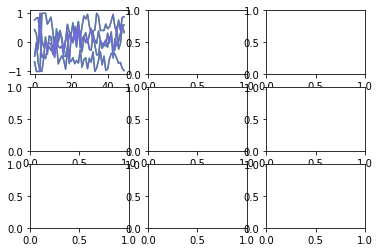

In [21]:
train_policy(
    trainer=bc_trainer,
    learn_fct=bc_trainer.train,
    val_env=model.env,
    logname='BC Trainer Test',
    path='/home/hendrik/Documents/master_project/LokalData/ImitationLearning/',
    n_epochs=1000,
    n_steps=5000,
    eval_epochs=100,
    step_fct=lambda i: i+1
)

In [ ]:
bc_trainer.train(n_epochs=100)

In [ ]:
#path_to_zip_file = '/home/hendrik/Documents/master_project/Code/rl-baselines3-zoo/rl-trained-agents/her/FetchPickAndPlace-v1_1/FetchPickAndPlace-v1.zip'
path_to_zip_file = '/home/hendrik/Documents/master_project/Code/rl-baselines3-zoo/logs/tqc/FetchPickAndPlace-v1_1/FetchPickAndPlace-v1.zip'
path_to_zip_file = '/home/hendrik/Documents/master_project/Code/rl-baselines3-zoo/rl-trained-agents/tqc/FetchPickAndPlace-v1_1/FetchPickAndPlace-v1.zip'
directory_to_extract_to = '/tmp/sbtest'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
policy = torch.load('/tmp/sbtest/policy.pth')

In [ ]:
train_policy(
    trainer=model, 
    learn_fct=learn_wrapper.train, 
    val_env=val_env, 
    logname='HER Test', 
    path='/home/hendrik/Documents/master_project/LokalData/nISB/',
    n_epochs=1000,
    n_steps=20,
    eval_epochs=100)

NameError: name 'learn_wrapper' is not defined